In [1]:
# import the required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sbs

# do not display warnings in notebook 
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Preprocessing in train data

In [3]:
# reading train data
df = pd.read_csv("/home/himanshu/Deloitte Case Study/data.csv", index_col=0)

In [4]:
# printing first 5 column to get a overall idea about the data 
df.head()

,Age,WorkClass,fnlwgt,Education,EducationNum,MaritalStatus,Occupation,Relationship,Gender,CapitalGain,CapitalLoss,HoursPerWeek,NativeCountry,Income
0,39.0,State-gov,77516.0,Bachelors,13.0,Never-married,Adm-clerical,Not-in-family,Male,2174.0,0.0,40.0,United-States,<=50K
1,50.0,Self-emp-not-inc,83311.0,Bachelors,13.0,Married-civ-spouse,NaN,Husband,Male,0.0,0.0,13.0,United-States,<=50K
2,38.0,Private,215646.0,HS-grad,9.0,Divorced,Handlers-cleaners,Not-in-family,Male,0.0,0.0,40.0,United-States,<=50K
3,53.0,Private,NaN,NaN,7.0,Married-civ-spouse,Handlers-cleaners,Husband,Male,0.0,NaN,40.0,United-States,<=50K
4,28.0,Private,338409.0,Bachelors,13.0,Married-civ-spouse,Prof-specialty,Wife,NaN,0.0,0.0,40.0,Cuba,<=50K


In [5]:
# checking the dimensions of the data
df.shape

(40935, 14)

In [6]:
# checking for missing values
df.isnull().sum()/len(df)

Age              0.066960
WorkClass        0.068132
fnlwgt           0.068059
Education        0.067009
EducationNum     0.068474
MaritalStatus    0.071430
Occupation       0.067400
Relationship     0.068768
Gender           0.066618
CapitalGain      0.068548
CapitalLoss      0.066398
HoursPerWeek     0.065470
NativeCountry    0.066667
Income           0.000000
dtype: float64

In [7]:
# printing data types for imputation of missing values
df.dtypes

Age              float64
WorkClass         object
fnlwgt           float64
Education         object
EducationNum     float64
MaritalStatus     object
Occupation        object
Relationship      object
Gender            object
CapitalGain      float64
CapitalLoss      float64
HoursPerWeek     float64
NativeCountry     object
Income            object
dtype: object

In [9]:
# We can build supervised learning models to predict values on the basis of other variables and then use them along with other variables to predict income.
# But as only 6% of data is missing, we can impute numeric variables with Median and categorical variables with Mode
# This won't affect the distribution as only about 6% of the data is missing. Hence we will use median and mode imputation here
# defining the function to impute missing value
def cat_nanpute(df):
    cat_col = list(df.select_dtypes(['object']).columns)
    nan_col = [col for col in cat_col if df[col].isnull().sum()>0]
    most_occurence =[df[col].fillna(df[col].value_counts().idxmax(),inplace=True) for col in nan_col]

def num_nanpute(df):
    numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64'] 
    nan_col = [col for col in df.select_dtypes(include=numerics).columns if df[col].isnull().sum()>0]
    most_occurence =[df[col].fillna(df[col].median(),inplace=True) for col in nan_col]

In [10]:
# impute the numeric variables of train data
num_nanpute(df)
# impute the categorical variables of train data
cat_nanpute(df)

In [11]:
# Now we will expect to see zero missing values
df.isnull().sum()

Age              0
WorkClass        0
fnlwgt           0
Education        0
EducationNum     0
MaritalStatus    0
Occupation       0
Relationship     0
Gender           0
CapitalGain      0
CapitalLoss      0
HoursPerWeek     0
NativeCountry    0
Income           0
dtype: int64

In [13]:
# selecting numeric variables
df_num = df.select_dtypes(exclude=['object'])
df_num.shape

(40935, 6)

In [14]:
# defining histogram_function
def histograms_plot(dataframe, features, rows, cols):
    fig=plt.figure(figsize=(20,20))
    for i, feature in enumerate(dataframe.columns):
        ax=fig.add_subplot(rows,cols,i+1)
        dataframe[feature].hist(bins=20,ax=ax,facecolor='#2e8b57')
        ax.set_title(feature+" Distribution",color='red')

    fig.tight_layout()  

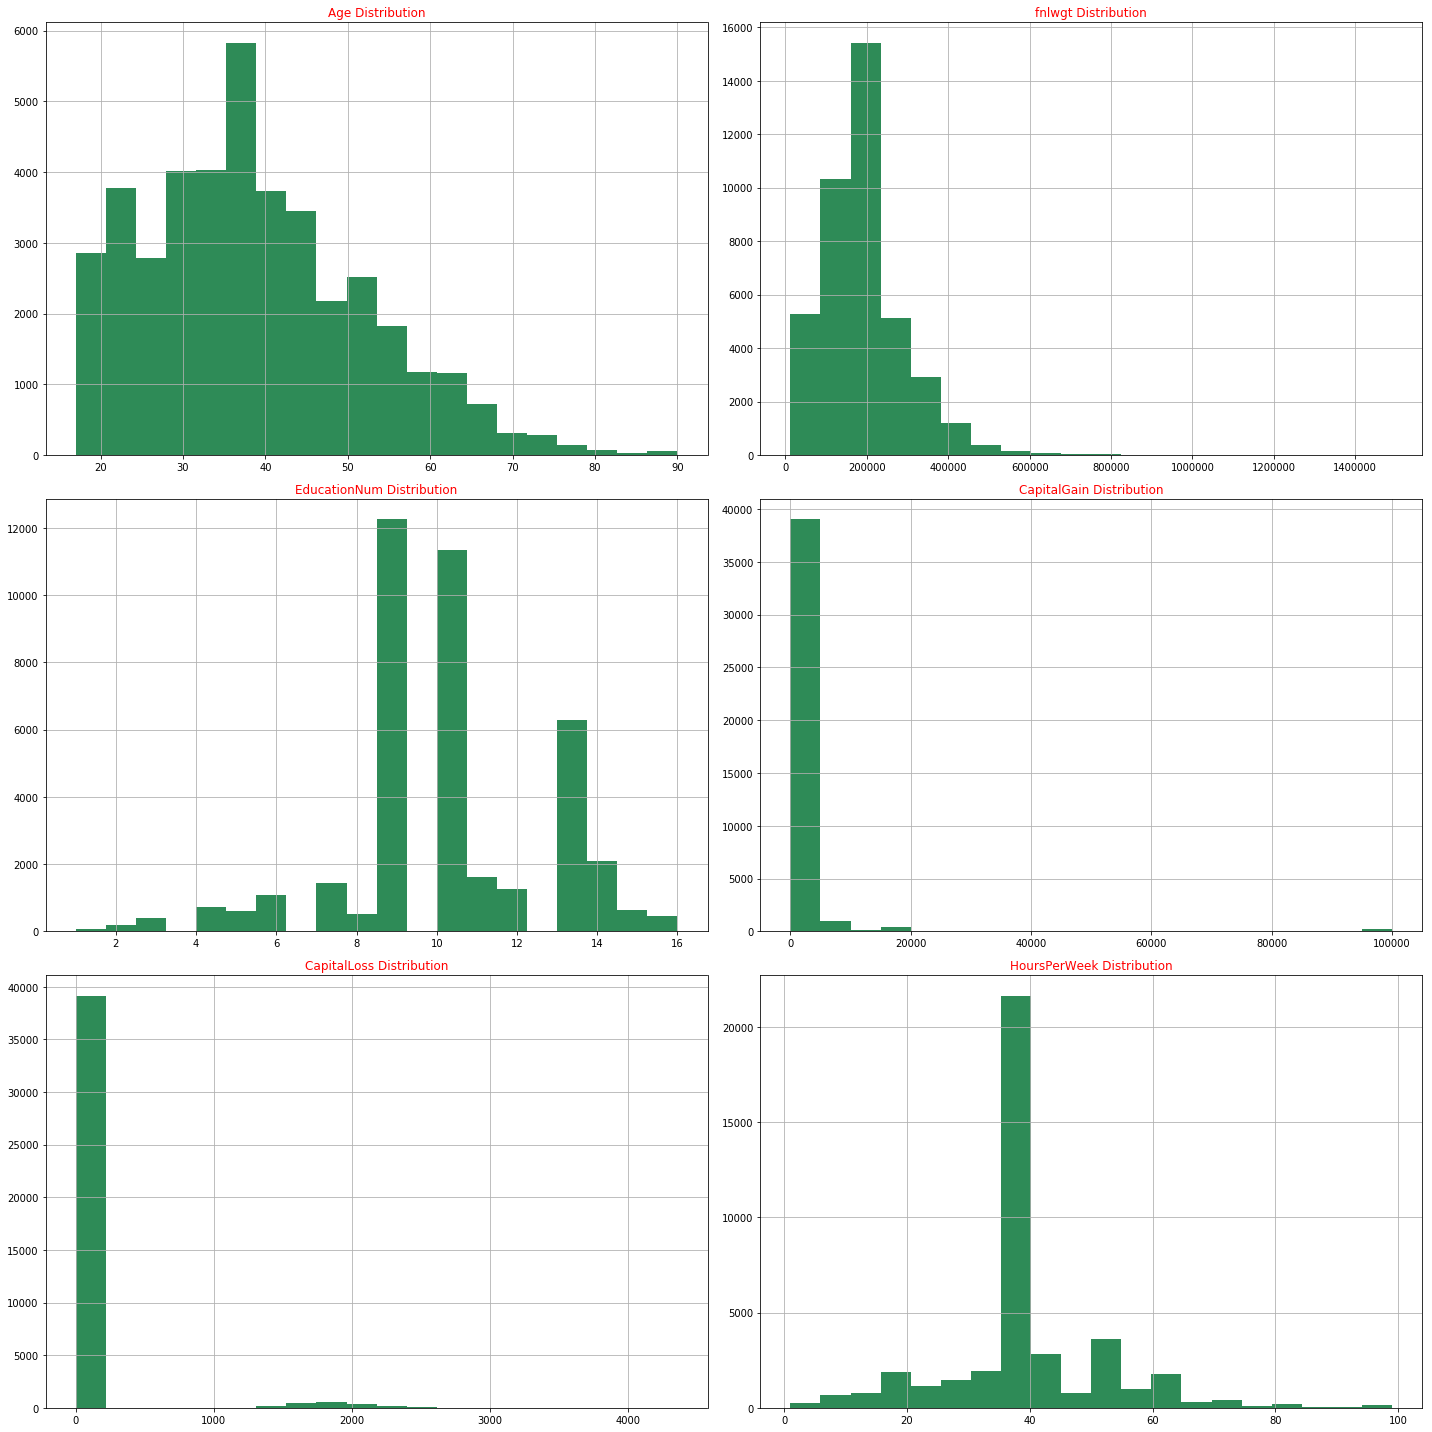

In [15]:
# Calling histogram function
histograms_plot(df_num, df_num.columns, 3,2)

In [16]:
# From the above distribution we can see that capital gain and capital loss columns have skewed distribution with maximum values as zero
# As we wont get any usefull information from these columns we will drop these 2 columns 
df.drop(['CapitalGain', 'CapitalLoss'], axis = 1, inplace = True)

In [17]:
# Selecting categorical columns
df_cat = df.select_dtypes(["object"])
df_cat.shape

(40935, 8)

In [18]:
# defining bar plot function
def bar_plot(dataframe, features, rows, cols):
    fig=plt.figure(figsize=(20,20))
    for i, column in enumerate(df_cat.columns):
        ax=fig.add_subplot(4,2,i+1)
        sbs.countplot(df_cat[column],ax=ax)

    fig.tight_layout()  

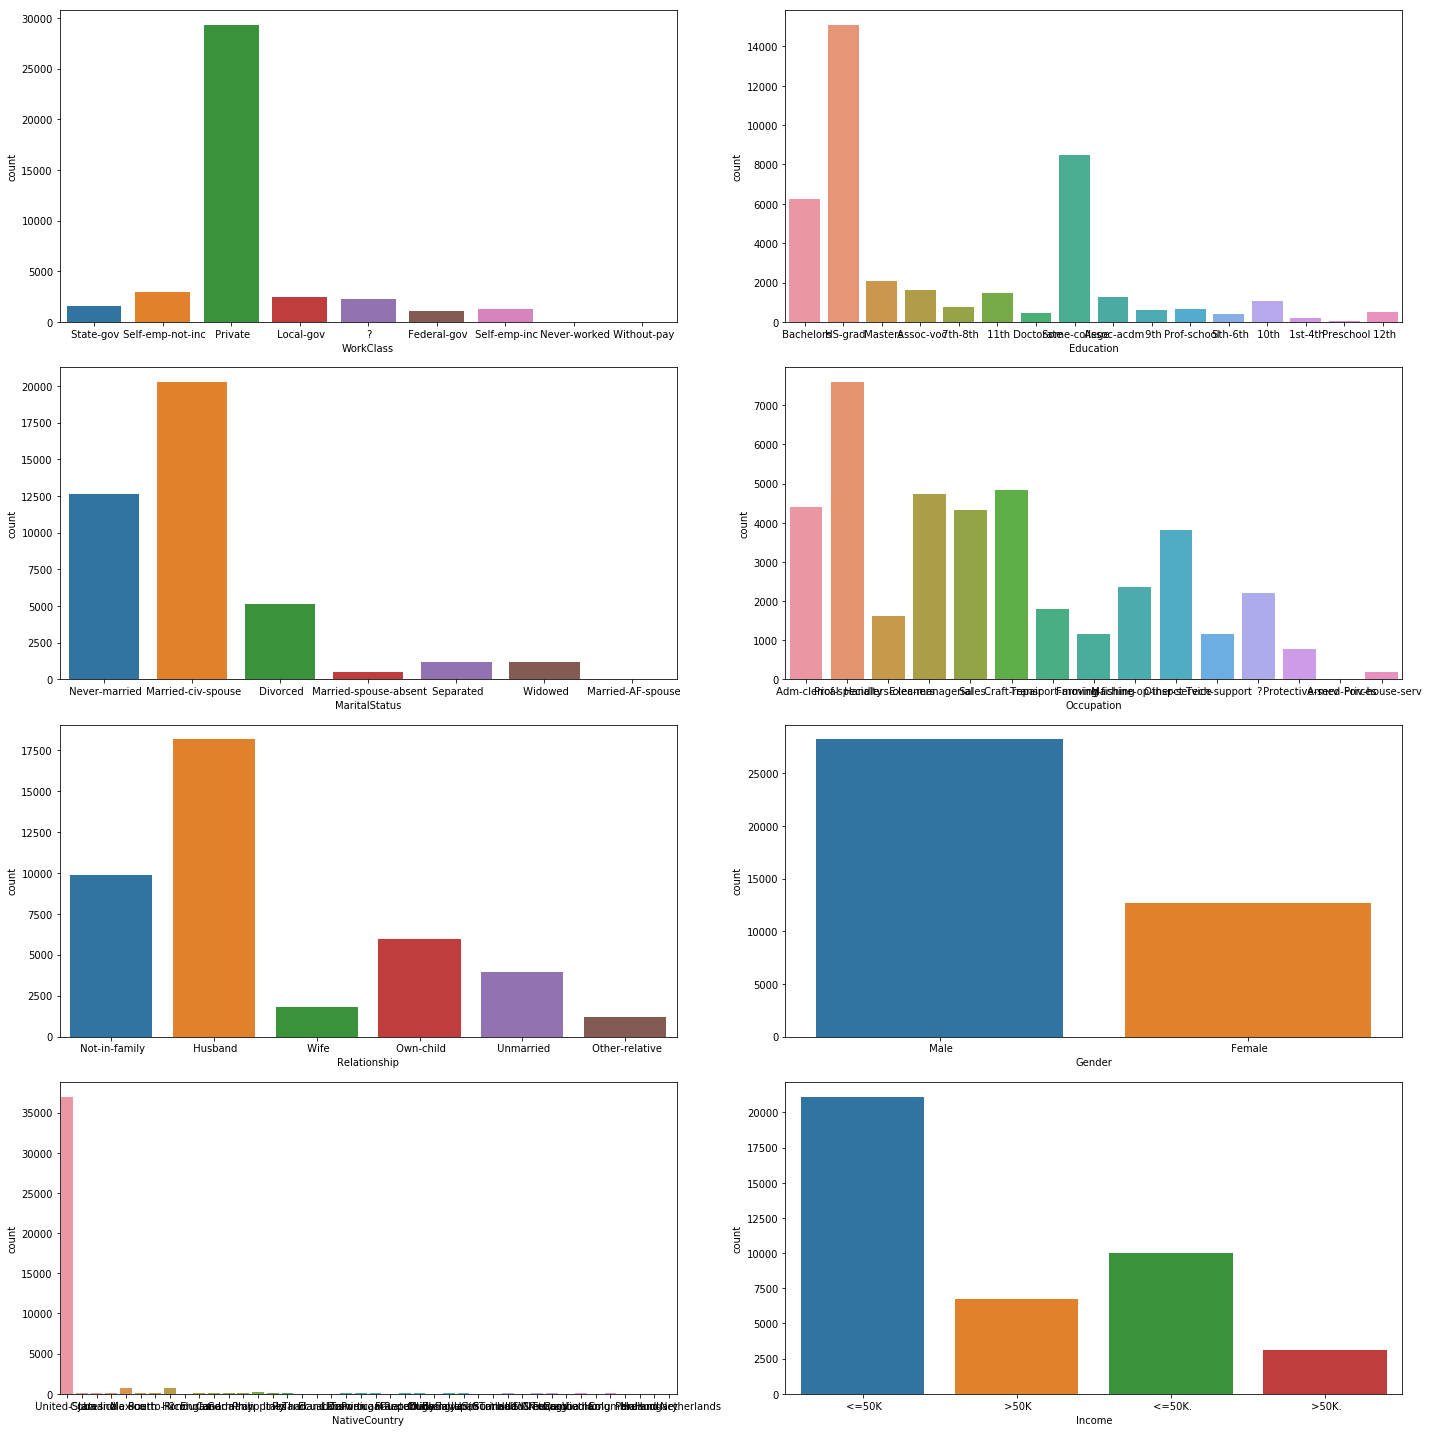

In [19]:
# Calling bar plot function
bar_plot(df_cat, df_cat.columns, 4, 2)

In [20]:
cat_col = df_cat.columns

In [21]:
df_cat.columns

Index(['WorkClass', 'Education', 'MaritalStatus', 'Occupation', 'Relationship',
       'Gender', 'NativeCountry', 'Income'],
      dtype='object')

In [22]:
# removing unnecessary space
df[cat_col] = df[cat_col].apply(lambda x: x.str.strip())

In [23]:
#Filter categorical variables
categorical_columns = [x for x in df.dtypes.index if df.dtypes[x] == 'object']
for col in categorical_columns:
   print ('\nFrequency of Categories for variable %s'%col)
   print (df[col].value_counts())


Frequency of Categories for variable WorkClass
Private             29318
Self-emp-not-inc     2962
Local-gov            2443
?                    2222
State-gov            1544
Self-emp-inc         1314
Federal-gov          1107
Without-pay            16
Never-worked            9
Name: WorkClass, dtype: int64

Frequency of Categories for variable Education
HS-grad         15099
Some-college     8501
Bachelors        6243
Masters          2102
Assoc-voc        1622
11th             1444
Assoc-acdm       1260
10th             1079
7th-8th           735
Prof-school       646
9th               598
12th              501
Doctorate         464
5th-6th           382
1st-4th           195
Preschool          64
Name: Education, dtype: int64

Frequency of Categories for variable MaritalStatus
Married-civ-spouse       20266
Never-married            12664
Divorced                  5101
Widowed                   1207
Separated                 1195
Married-spouse-absent      473
Married-AF-spouse   

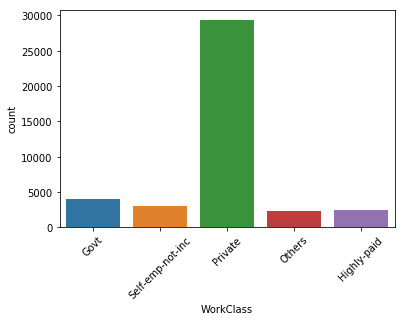

In [24]:
# Combine WorkClass
df['WorkClass'] = df['WorkClass'].replace(['Local-gov','State-gov'],'Govt')
df['WorkClass'] = df['WorkClass'].replace(['Federal-gov','Self-emp-inc'],'Highly-paid')
df['WorkClass'] = df['WorkClass'].replace(['?','Without-pay','Never-worked'],'Others')
sbs.countplot(x='WorkClass', data=df);
plt.xticks(rotation=45);

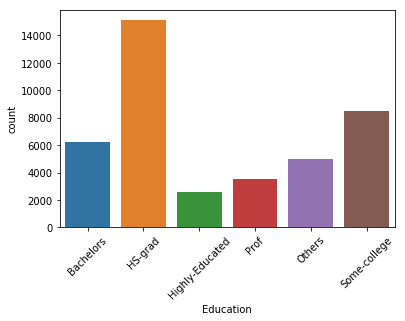

In [25]:
# Combine Education class
df['Education'] = df['Education'].replace(['Masters','Doctorate'],'Highly-Educated')
df['Education'] = df['Education'].replace(['Assoc-acdm','Prof-school','Assoc-voc'],'Prof')
df['Education'] = df['Education'].replace(['11th','10th','7th-8th','9th','12th','5th-6th','1st-4th','Preschool'],'Others')
sbs.countplot(x='Education', data=df);
plt.xticks(rotation=45);

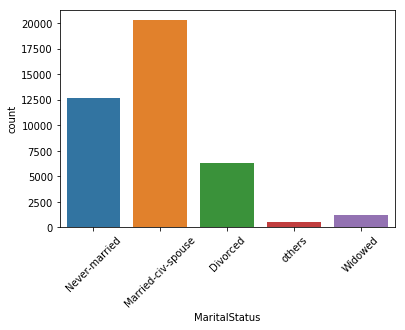

In [26]:
# Combine MaritalStatus class
df['MaritalStatus'] = df['MaritalStatus'].replace(['Married-spouse-absent','Married-AF-spouse'],'others')
df['MaritalStatus'] = df['MaritalStatus'].replace(['Separated','Divorced'],'Divorced')
sbs.countplot(x='MaritalStatus', data=df);
plt.xticks(rotation=45);

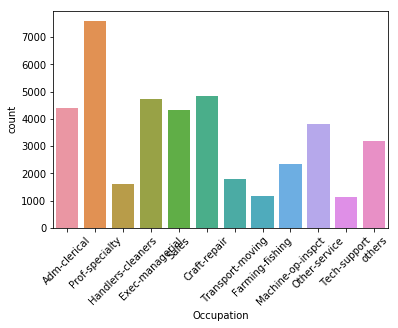

In [27]:
# Combine Occupation class
df['Occupation'] = df['Occupation'].replace(['?','Protective-serv','Priv-house-serv','Armed-Forces'],'others')
sbs.countplot(x='Occupation', data=df);
plt.xticks(rotation=45);

In [28]:
# Define the function to convert country other than US to Immigrant
def country(x):
    if x == 'United-States':
        return('US_citizen')
    else:
        return('Immigrant')

In [29]:
# Calling country function on NativeCountry variable
df['NativeCountry'] = df['NativeCountry'].apply(lambda x : country(x))
df['NativeCountry'].value_counts()

US_citizen    36994
Immigrant      3941
Name: NativeCountry, dtype: int64

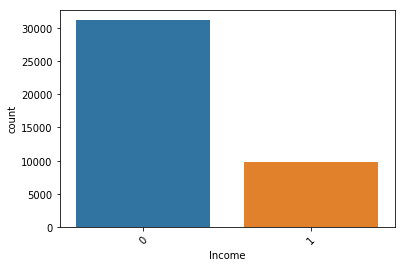

In [30]:
# Combine Income class
df['Income'] = df['Income'].replace(['<=50K', '<=50K.'],0)
df['Income'] = df['Income'].replace(['>50K', '>50K.'],1)
sbs.countplot(x='Income', data=df);
plt.xticks(rotation=45);

In [31]:
# preprocessing in validation data

In [32]:
# reading test data
test = pd.read_csv("/home/himanshu/Deloitte Case Study/final.csv", index_col=0)

In [33]:
# printing first 5 column to get a overall idea about the data 
test.head()

,Age,WorkClass,fnlwgt,Education,EducationNum,MaritalStatus,Occupation,Relationship,Gender,CapitalGain,CapitalLoss,HoursPerWeek,NativeCountry
391,27.0,Private,301302.0,Bachelors,13.0,Never-married,Craft-repair,Not-in-family,Male,0.0,0.0,50.0,United-States
1899,23.0,Private,119838.0,Bachelors,13.0,Never-married,Prof-specialty,NaN,Male,0.0,0.0,NaN,United-States
24506,21.0,Private,113106.0,Some-college,10.0,Never-married,NaN,Own-child,Female,NaN,0.0,30.0,United-States
255,21.0,Private,250939.0,Some-college,10.0,Never-married,Machine-op-inspct,Other-relative,Male,0.0,0.0,35.0,United-States
15331,32.0,Private,155151.0,HS-grad,9.0,Married-civ-spouse,Craft-repair,Husband,Male,0.0,0.0,55.0,United-States


In [34]:
# checking the dimension of the data
test.shape

(4884, 13)

In [35]:
# checking for missing values
test.isnull().sum()/len(test)

Age              0.059582
WorkClass        0.060401
fnlwgt           0.063882
Education        0.066544
EducationNum     0.066134
MaritalStatus    0.067568
Occupation       0.064292
Relationship     0.066953
Gender           0.063063
CapitalGain      0.067772
CapitalLoss      0.065111
HoursPerWeek     0.068796
NativeCountry    0.066339
dtype: float64

In [36]:
test.dtypes

Age              float64
WorkClass         object
fnlwgt           float64
Education         object
EducationNum     float64
MaritalStatus     object
Occupation        object
Relationship      object
Gender            object
CapitalGain      float64
CapitalLoss      float64
HoursPerWeek     float64
NativeCountry     object
dtype: object

In [38]:
# Using same imputation function for imputing test set, imputation will be done as per train data imputation 
# as we assume that both data set are following same distribution 
def cat_nanpute_test(df1):
    cat_col = list(df1.select_dtypes(['object']).columns)
    nan_col = [col for col in cat_col if df1[col].isnull().sum()>0]
    most_occurence =[df1[col].fillna(test[col].value_counts().idxmax(),inplace=True) for col in nan_col]

def num_nanpute_test(df1):
    numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64'] 
    nan_col = [col for col in df1.select_dtypes(include=numerics).columns if df1[col].isnull().sum()>0]
    most_occurence =[df1[col].fillna(test[col].median(),inplace=True) for col in nan_col]

In [39]:
# impute the numeric variables of test data
num_nanpute_test(test)
# impute the categorical variables of test data
cat_nanpute_test(test)

In [40]:
# Now we will expect to see zero missing values
test.isnull().sum()

Age              0
WorkClass        0
fnlwgt           0
Education        0
EducationNum     0
MaritalStatus    0
Occupation       0
Relationship     0
Gender           0
CapitalGain      0
CapitalLoss      0
HoursPerWeek     0
NativeCountry    0
dtype: int64

In [43]:
# selecting numeric variables
df_num_test = test.select_dtypes(exclude=['object'])
df_num_test.shape

(4884, 6)

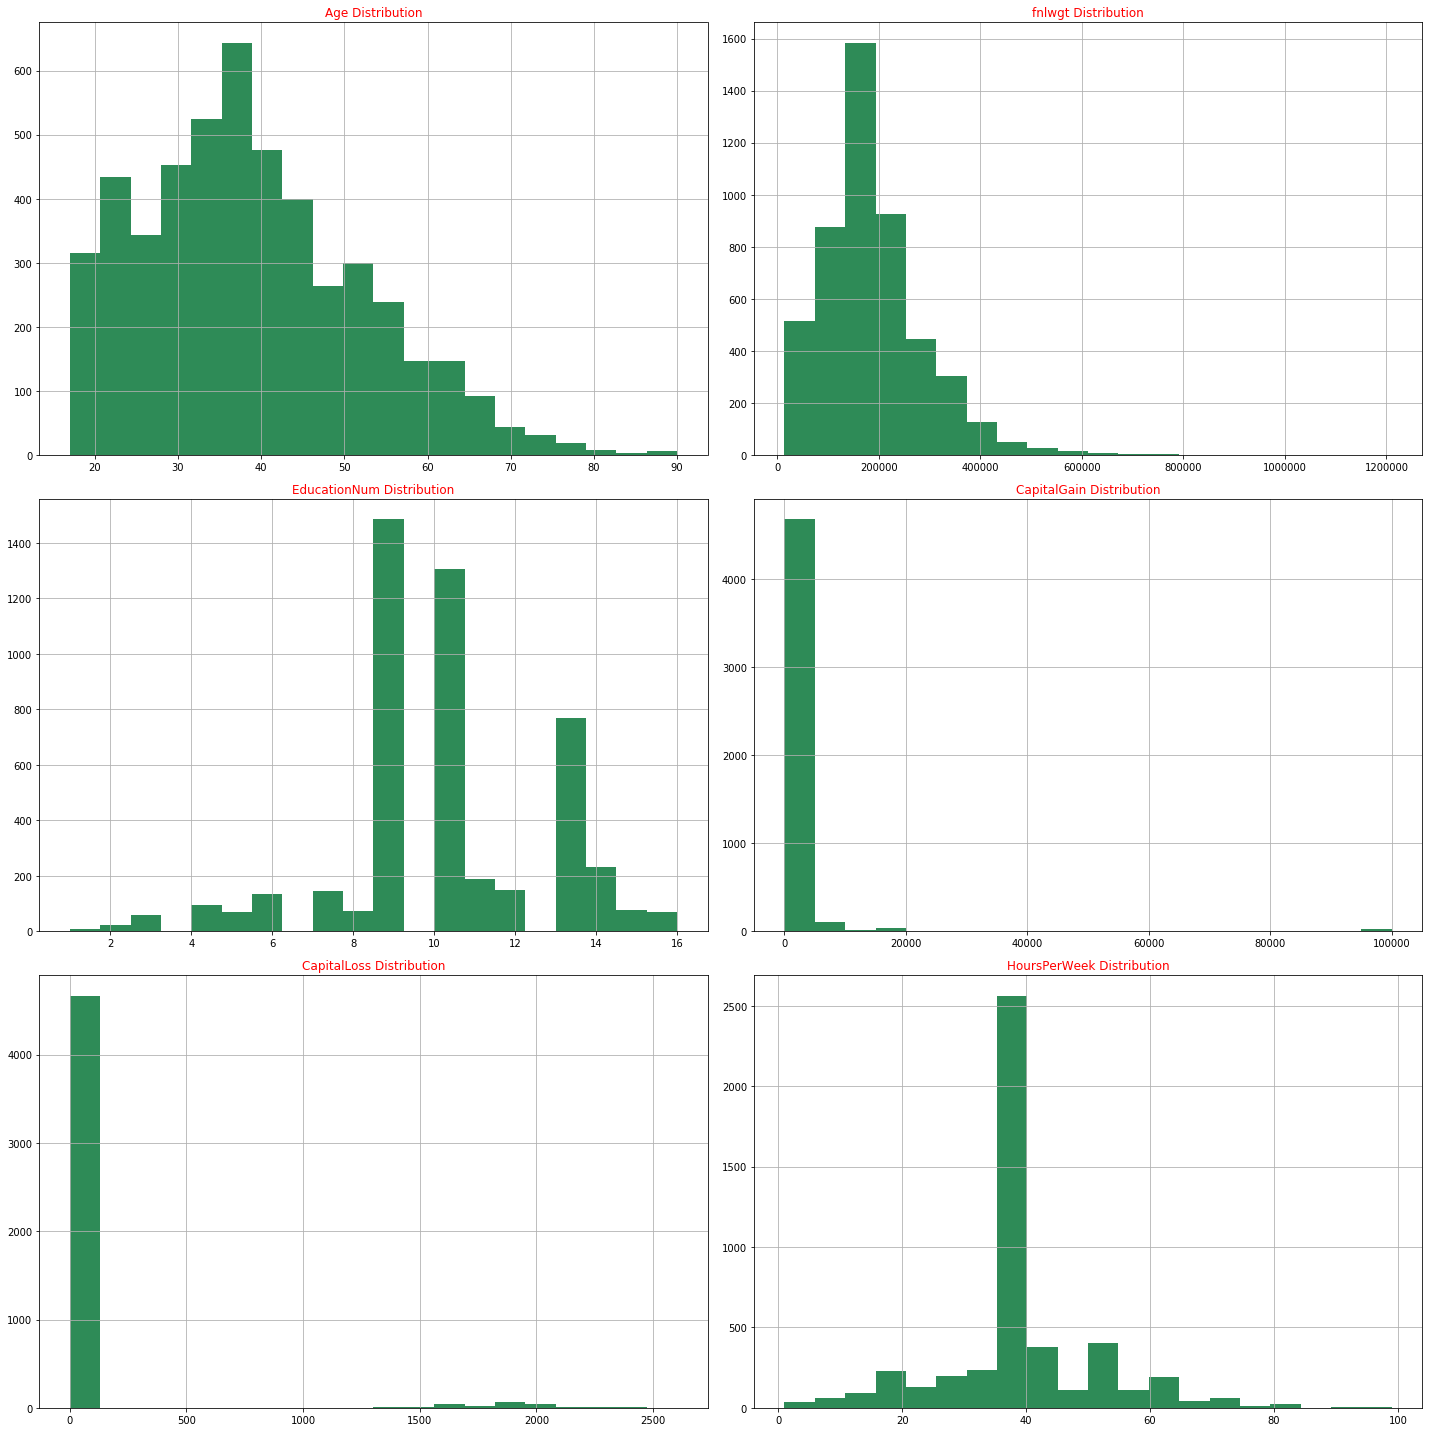

In [44]:
# Calling histogram function
histograms_plot(df_num_test, df_num_test.columns, 3,2)

In [45]:
# Drop CapitalGain and CapitalLoss variables similar to train set
test.drop(['CapitalGain', 'CapitalLoss'], axis = 1, inplace = True)

In [48]:
# Selecting categorical columns
test_cat = test.select_dtypes(["object"])
test_cat.shape

(4884, 7)

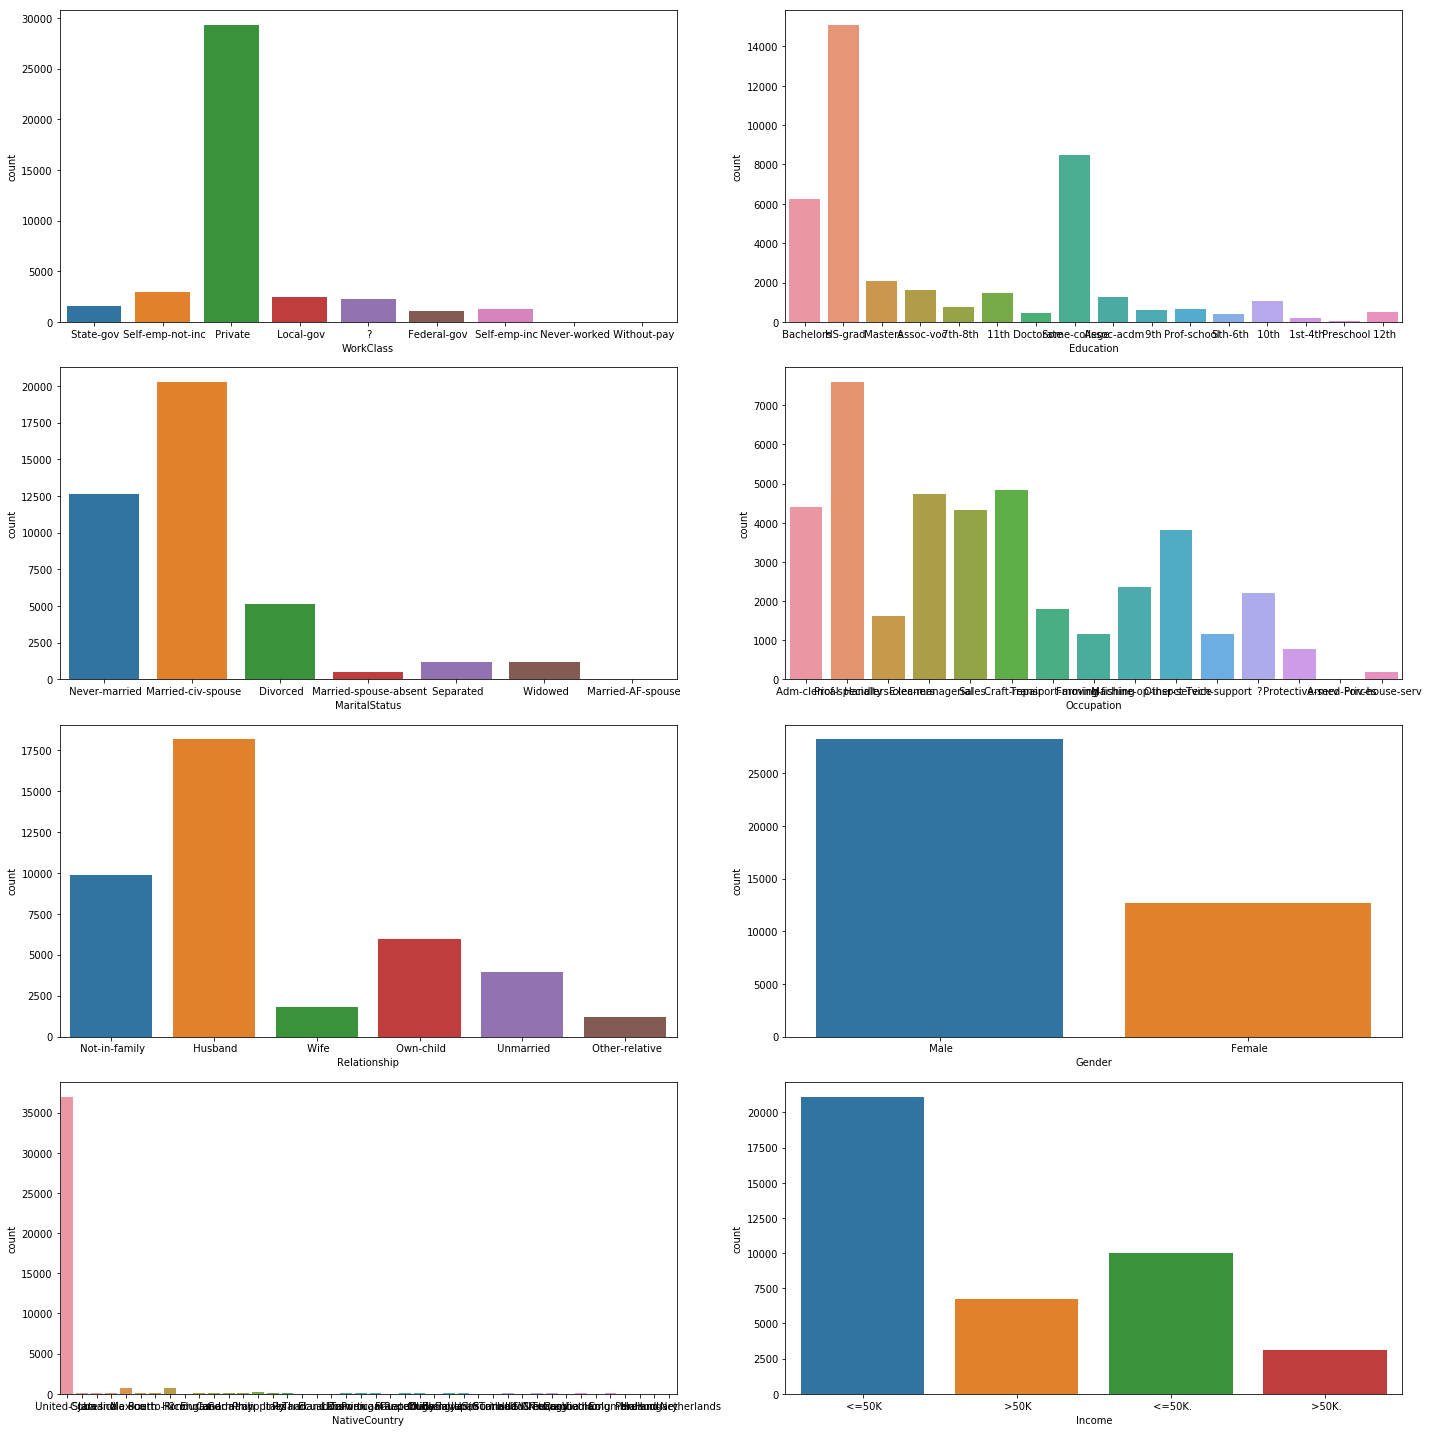

In [49]:
# Calling bar plot function
bar_plot(test_cat, test_cat.columns, 4, 2)

In [50]:
cat_col = test_cat.columns

In [51]:
# removing unnecessary space
test[cat_col] = test[cat_col].apply(lambda x: x.str.strip())

In [52]:
# Filter categorical variables and explore the value counts of each categorical levels
categorical_columns = [x for x in test.dtypes.index if df.dtypes[x] == 'object']
for col in categorical_columns:
   print ('\nFrequency of Categories for variable %s'%col)
   print (test[col].value_counts())


Frequency of Categories for variable WorkClass
Private             3447
Self-emp-not-inc     381
Local-gov            286
?                    262
State-gov            201
Self-emp-inc         168
Federal-gov          139
Name: WorkClass, dtype: int64

Frequency of Categories for variable Education
HS-grad         1799
Some-college     997
Bachelors        777
Masters          232
Assoc-voc        179
Assoc-acdm       152
11th             146
10th             135
7th-8th           97
Prof-school       75
9th               69
12th              68
Doctorate         68
5th-6th           59
1st-4th           24
Preschool          7
Name: Education, dtype: int64

Frequency of Categories for variable MaritalStatus
Married-civ-spouse       2457
Never-married            1447
Divorced                  642
Separated                 158
Widowed                   120
Married-spouse-absent      57
Married-AF-spouse           3
Name: MaritalStatus, dtype: int64

Frequency of Categories for variable

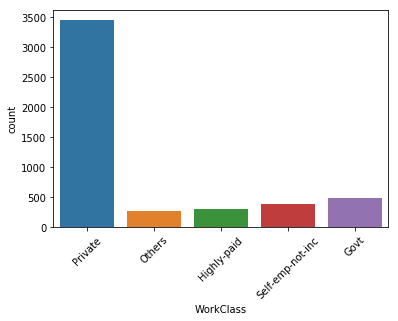

In [53]:
# Combine WorkClass
test['WorkClass'] = test['WorkClass'].replace(['Local-gov','State-gov'],'Govt')
test['WorkClass'] = test['WorkClass'].replace(['Federal-gov','Self-emp-inc'],'Highly-paid')
test['WorkClass'] = test['WorkClass'].replace(['?','Without-pay','Never-worked'],'Others')
sbs.countplot(x='WorkClass', data=test);
plt.xticks(rotation=45);

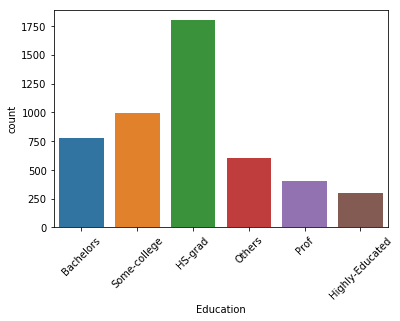

In [54]:
# Combine Education class
test['Education'] = test['Education'].replace(['Masters','Doctorate'],'Highly-Educated')
test['Education'] = test['Education'].replace(['Assoc-acdm','Prof-school','Assoc-voc'],'Prof')
test['Education'] = test['Education'].replace(['11th','10th','7th-8th','9th','12th','5th-6th','1st-4th','Preschool'],'Others')
sbs.countplot(x='Education', data=test);
plt.xticks(rotation=45);

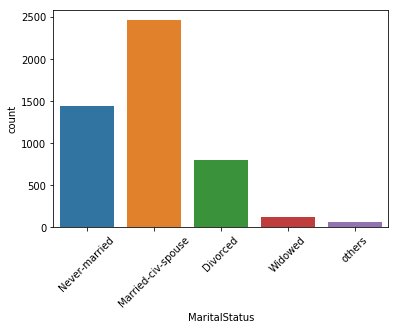

In [55]:
# combine MaritalStatus class
test['MaritalStatus'] = test['MaritalStatus'].replace(['Married-spouse-absent','Married-AF-spouse'],'others')
test['MaritalStatus'] = test['MaritalStatus'].replace(['Separated','Divorced'],'Divorced')
sbs.countplot(x='MaritalStatus', data=test);
plt.xticks(rotation=45);

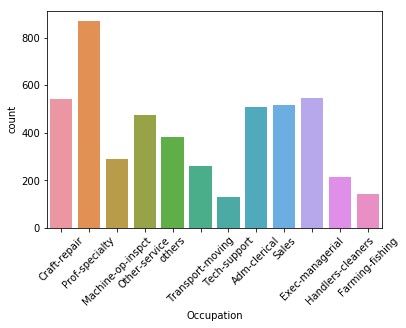

In [56]:
# Combine Occupation class
test['Occupation'] = test['Occupation'].replace(['?','Protective-serv','Priv-house-serv','Armed-Forces'],'others')
sbs.countplot(x='Occupation', data=test);
plt.xticks(rotation=45);

In [57]:
test['NativeCountry'] = test['NativeCountry'].apply(lambda x : country(x))
test['NativeCountry'].value_counts()

US_citizen    4414
Immigrant      470
Name: NativeCountry, dtype: int64

In [58]:
# One hot encoding

In [59]:
# Storing income series and dropping it from original dataset
income = df.Income
df.drop(['Income'], axis = 1, inplace = True)

In [60]:
# One hot encode on train data
data_ohe = pd.get_dummies(df, drop_first=True, columns=['WorkClass', 'Education', 'MaritalStatus', 'Occupation', 'Relationship',
       'Gender', 'NativeCountry'])

In [61]:
data_ohe.head()

,Age,fnlwgt,EducationNum,HoursPerWeek,WorkClass_Highly-paid,WorkClass_Others,WorkClass_Private,WorkClass_Self-emp-not-inc,Education_HS-grad,Education_Highly-Educated,...,Occupation_Tech-support,Occupation_Transport-moving,Occupation_others,Relationship_Not-in-family,Relationship_Other-relative,Relationship_Own-child,Relationship_Unmarried,Relationship_Wife,Gender_Male,NativeCountry_US_citizen
0,39.0,77516.0,13.0,40.0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,1
1,50.0,83311.0,13.0,13.0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,1
2,38.0,215646.0,9.0,40.0,0,0,1,0,1,0,...,0,0,0,1,0,0,0,0,1,1
3,53.0,178251.0,7.0,40.0,0,0,1,0,1,0,...,0,0,0,0,0,0,0,0,1,1
4,28.0,338409.0,13.0,40.0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,1,0


In [62]:
# Adding Income back to one hot encoded dataset
data_ohe['Income'] = income

In [63]:
data_ohe.head(1)

,Age,fnlwgt,EducationNum,HoursPerWeek,WorkClass_Highly-paid,WorkClass_Others,WorkClass_Private,WorkClass_Self-emp-not-inc,Education_HS-grad,Education_Highly-Educated,...,Occupation_Transport-moving,Occupation_others,Relationship_Not-in-family,Relationship_Other-relative,Relationship_Own-child,Relationship_Unmarried,Relationship_Wife,Gender_Male,NativeCountry_US_citizen,Income
0,39.0,77516.0,13.0,40.0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,1,1,0


In [64]:
test_ohe = pd.get_dummies(test, drop_first=True, columns=['WorkClass', 'Education', 'MaritalStatus', 'Occupation', 'Relationship',
       'Gender', 'NativeCountry'])

In [65]:
# train validation split of traing data
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(data_ohe.iloc[:,:-1], data_ohe.Income, test_size=0.15, random_state=100)

# Logistic Regression

In [66]:
# Importing libraries
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, recall_score, precision_score, accuracy_score
# Model Building
clf = LogisticRegression()
clf.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [67]:
# Prediction on validation data

In [68]:
val_pred_lr = clf.predict(X_val)

In [69]:
print('Accuracy_score : ', accuracy_score(y_val, val_pred_lr))

Accuracy_score :  0.760950985182


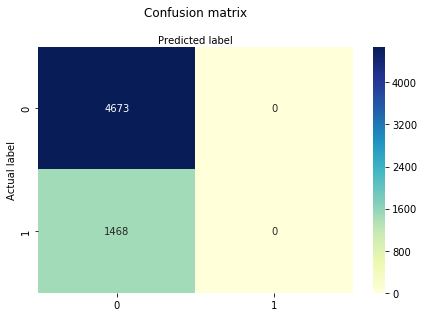

In [70]:
# Confusion matrix
cm = confusion_matrix(y_val, val_pred_lr)
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sbs.heatmap(pd.DataFrame(cm), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

As we can see model performed very badly, it may be because imblance in our dependent variable. We will balance 
the class and rebuild the model again

In [71]:
# Logistic regression model building with dependend variable balanced 
clf_tune = LogisticRegression(class_weight='balanced')
clf_tune.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight='balanced', dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

In [72]:
# Prediction on validation set
val_pred_lr_tune = clf_tune.predict(X_val)

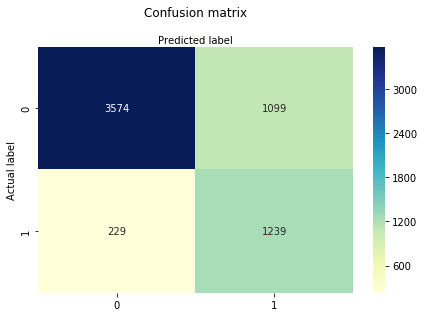

In [73]:
# Confusion matrix
cm = confusion_matrix(y_val, val_pred_lr_tune)
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sbs.heatmap(pd.DataFrame(cm), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [75]:
# Accuracy calculation on evaluation set
print('Accuracy_score : ', accuracy_score(y_val, val_pred_lr_tune))
# Calculating precision and recall score on evaluation set
print('Precision:', precision_score(list(y_val), val_pred_lr_tune))
print('Recall:', recall_score(list(y_val), val_pred_lr_tune))

Accuracy_score :  0.783748575151
Precision: 0.52994011976
Recall: 0.844005449591


In [77]:
# Predicting on train set to check overfit
train_pred_lr_tune = clf_tune.predict(X_train)
# Accuracy calculation on training set to check overfit
print('Accuracy_score : ', accuracy_score(y_train, train_pred_lr_tune))
# Calculating precision and recall score on training set to check overfit
print('Precision:', precision_score(list(y_train), train_pred_lr_tune))
print('Recall:', recall_score(list(y_train), train_pred_lr_tune))

Accuracy_score :  0.77809392424
Precision: 0.523293202722
Recall: 0.838686481304


In [78]:
# By balanced logistic regression model we able to build a stable model which is not over fitted. Now we will use
# Random Forest to get Accuracy

# Random forest

In [79]:
# importing libraries for random forest
from sklearn.ensemble import RandomForestClassifier
# Defining rf instance
rfc = RandomForestClassifier()

In [80]:
# Fitting the model
rfc.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [81]:
# Prediction on evalution set
val_pred_rf = rfc.predict(X_val)

In [82]:
# Accuracy calculation on evaluation set
print('Accuracy_score : ', accuracy_score(y_val, val_pred_rf))
# Calculating precision and recall score on evaluation set
print('Precision:', precision_score(list(y_val), val_pred_rf))
print('Recall:', recall_score(list(y_val), val_pred_rf))

Accuracy_score :  0.817944960104
Precision: 0.660845588235
Recall: 0.489782016349


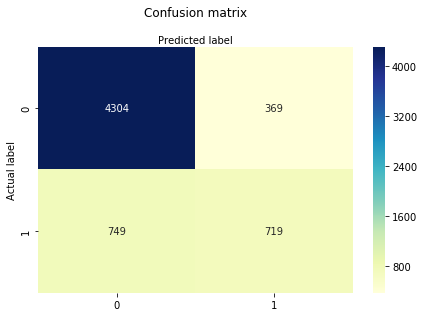

In [83]:
# Confusion Matrix
cm = confusion_matrix(y_val, val_pred_rf)
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sbs.heatmap(pd.DataFrame(cm), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

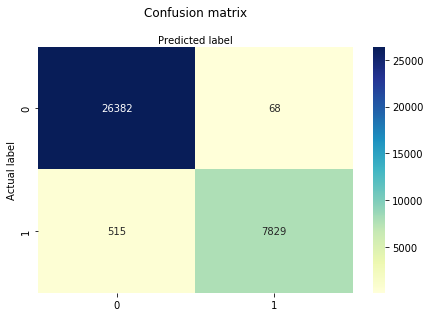

In [84]:
# Confusion matrix on training set to check for the overfit
pred_train = rfc.predict(X_train)
cm = confusion_matrix(y_train, pred_train)
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sbs.heatmap(pd.DataFrame(cm), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [85]:
# Accuracy calculation on training set to check overfit
print('Accuracy_score : ', accuracy_score(y_train, pred_train))
# Calculating precision and recall score on training set to check overfit
print('Precision:', precision_score(list(y_train), pred_train))
print('Recall:', recall_score(list(y_train), pred_train))

Accuracy_score :  0.983244237512
Precision: 0.991389135115
Recall: 0.938279002876


Our Random Forest model over fitted, Now to reduce overfitting we will use cross validation

In [86]:
# Importing libraries for grid search
from sklearn.model_selection import RandomizedSearchCV

In [87]:
n_estimators = np.arange(3,25,2)
max_depth = np.arange(1,5,1)
criterion = ['gini', 'entropy']
min_samples_split = np.arange(2,6,1)
min_samples_leaf = np.arange(2,6,1)
random_state = [1337]

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_depth': max_depth, 
               'criterion': criterion,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'random_state': random_state}

print(random_grid)

{'n_estimators': array([ 3,  5,  7,  9, 11, 13, 15, 17, 19, 21, 23]), 'max_depth': array([1, 2, 3, 4]), 'criterion': ['gini', 'entropy'], 'min_samples_split': array([2, 3, 4, 5]), 'min_samples_leaf': array([2, 3, 4, 5]), 'random_state': [1337]}


In [88]:
# Create Base Model for tuning
rf = RandomForestClassifier()

# Instantiate Random Search of Parameters using 3 fold cross validation
rf_random = RandomizedSearchCV(estimator=rf,
                               param_distributions=random_grid, 
                               n_iter=10, 
                               cv=4, 
                               random_state=137)

In [89]:
# Execute training (Fit the random search model)
rf_random.fit(X_train, y_train) 

RandomizedSearchCV(cv=4, error_score='raise',
          estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
          fit_params=None, iid=True, n_iter=10, n_jobs=1,
          param_distributions={'n_estimators': array([ 3,  5,  7,  9, 11, 13, 15, 17, 19, 21, 23]), 'max_depth': array([1, 2, 3, 4]), 'criterion': ['gini', 'entropy'], 'min_samples_split': array([2, 3, 4, 5]), 'min_samples_leaf': array([2, 3, 4, 5]), 'random_state': [1337]},
          pre_dispatch='2*n_jobs', random_state=137, refit=True,
          return_train_score=True, scoring=None, verbose=0)

In [90]:
# Checkout the best set of Parameters
rf_random.best_params_

{'criterion': 'entropy',
 'max_depth': 4,
 'min_samples_leaf': 2,
 'min_samples_split': 4,
 'n_estimators': 23,
 'random_state': 1337}

In [91]:
# Get the best estimator
best_rf = rf_random.best_estimator_

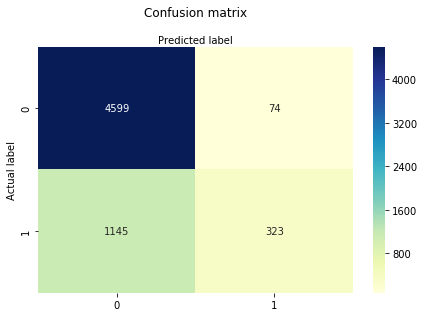

In [92]:
# Confution matrix on evaluation set
pred_rf_cv_eval = best_rf.predict(X_val)
cm = confusion_matrix(y_val, pred_rf_cv_eval)
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sbs.heatmap(pd.DataFrame(cm), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

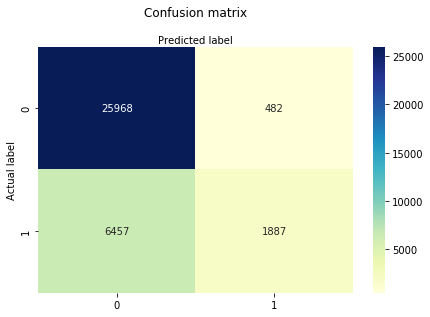

In [93]:
# Confusion matrix on training set to check for the overfit
pred_train_rf = best_rf.predict(X_train)
cm = confusion_matrix(y_train, pred_train_rf)
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sbs.heatmap(pd.DataFrame(cm), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [95]:
# Accuracy calculation on evaluation set
print('Accuracy_score : ', accuracy_score(y_val, pred_rf_cv_eval))
# Calculating precision and recall score on evaluation set
print('Precision:', precision_score(list(y_val), pred_rf_cv_eval))
print('Recall:', recall_score(list(y_val), pred_rf_cv_eval))

Accuracy_score :  0.801498127341
Precision: 0.813602015113
Recall: 0.220027247956


In [96]:
# Accuracy calculation on training set to check overfit
print('Accuracy_score : ', accuracy_score(y_train, pred_train_rf))
# Calculating precision and recall score on training set to check overfit
print('Precision:', precision_score(list(y_train), pred_train_rf))
print('Recall:', recall_score(list(y_train), pred_train_rf))

Accuracy_score :  0.800569063632
Precision: 0.796538623892
Recall: 0.226150527325


Although model is good is not over fitted but still the Recall is very less to improve we will try other algorithm

# Gradient Boosting

In [97]:
# import GBM
from sklearn.ensemble import GradientBoostingClassifier  #GBM algorithm

In [98]:
# GBM model with random parameter
gbm = GradientBoostingClassifier(learning_rate=0.1, n_estimators=100,max_depth=3, min_samples_split=2, min_samples_leaf=1, subsample=1,max_features='sqrt', random_state=10)
gbm.fit(X_train,y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features='sqrt', max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              presort='auto', random_state=10, subsample=1, verbose=0,
              warm_start=False)

In [99]:
# Prediction on evaluation set
pred_gbm = gbm.predict(X_val)

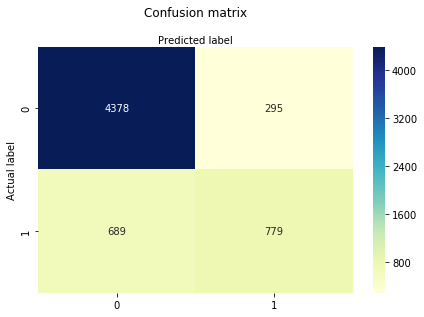

In [100]:
# Confusion matrix on evaluation set
cm = confusion_matrix(y_val, pred_gbm)
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sbs.heatmap(pd.DataFrame(cm), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

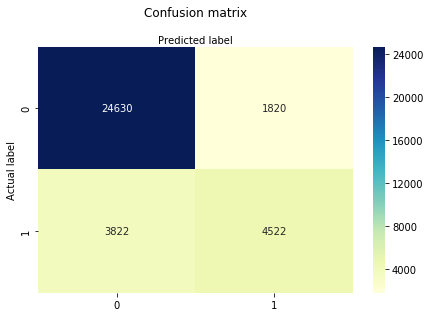

In [101]:
# Confusion matrix on training set to check for the overfit
pred_train_gbm = gbm.predict(X_train)
cm = confusion_matrix(y_train, pred_train_gbm)
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sbs.heatmap(pd.DataFrame(cm), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [102]:
# Accuracy calculation on evaluation set
print('Accuracy_score : ', accuracy_score(y_val, pred_gbm))
# Calculating precision and recall score on evaluation set
print('Precision:', precision_score(list(y_val), pred_gbm))
print('Recall:', recall_score(list(y_val), pred_gbm))

Accuracy_score :  0.839765510503
Precision: 0.725325884544
Recall: 0.530653950954


In [103]:
# Accuracy calculation on training set to check overfit
print('Accuracy_score : ', accuracy_score(y_train, pred_train_gbm))
# Calculating precision and recall score on training set to check overfit
print('Precision:', precision_score(list(y_train), pred_train_gbm))
print('Recall:', recall_score(list(y_train), pred_train_gbm))

Accuracy_score :  0.837845605564
Precision: 0.713024282561
Recall: 0.541946308725


Now we can observe here recall improve a lot as compare to Random forest, Now we will use grid serch cv to get best 
parameters

grid search cv taking longer time so we are skipping it as of now and we will try XGBOOST

# XGBOOST

In [106]:
# importing XGBOOST Classifier
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV

In [107]:
# XGBOOST model with default parameter
xgb = XGBClassifier()

In [108]:
# Model fit
xgb.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0, learning_rate=0.1,
       max_delta_step=0, max_depth=3, min_child_weight=1, missing=None,
       n_estimators=100, n_jobs=1, nthread=None,
       objective='binary:logistic', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=None, silent=None,
       subsample=1, verbosity=1)

In [109]:
# Prediction on evaluation set
pred_xgb = xgb.predict(X_val)

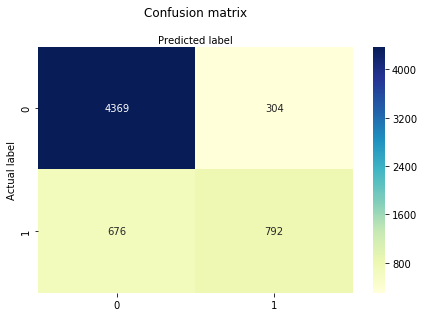

In [110]:
# Confusion matrix on evaluation set
cm = confusion_matrix(y_val, pred_xgb)
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sbs.heatmap(pd.DataFrame(cm), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

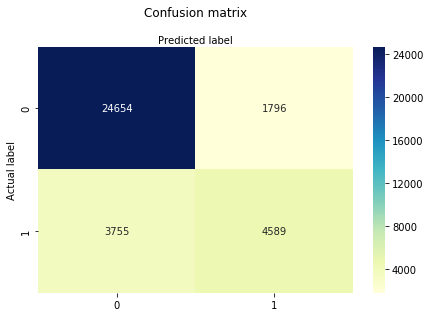

In [111]:
# Confusion matrix on training set to check for the overfit
pred_train_xgb = xgb.predict(X_train)
cm = confusion_matrix(y_train, pred_train_xgb)
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sbs.heatmap(pd.DataFrame(cm), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [112]:
# Accuracy calculation on evaluation set
print('Accuracy_score : ', accuracy_score(y_val, pred_xgb))
# Calculating precision and recall score on evaluation set
print('Precision:', precision_score(list(y_val), pred_xgb))
print('Recall:', recall_score(list(y_val), pred_xgb))

Accuracy_score :  0.840416870217
Precision: 0.722627737226
Recall: 0.539509536785


In [113]:
# Accuracy calculation on training set to check overfit
print('Accuracy_score : ', accuracy_score(y_train, pred_train_xgb)) 
# Calculating precision and recall score on training set to check overfit
print('Precision:', precision_score(list(y_train), pred_train_xgb))
print('Recall:', recall_score(list(y_train), pred_train_xgb))

Accuracy_score :  0.840460999023
Precision: 0.718715740016
Recall: 0.549976030681


We achived 54% recall to improve more we will try Grid search

In [114]:
alg = XGBClassifier(objective='binary:logistic')
xgb_gs = GridSearchCV(alg,{'max_depth': [2,4,5,6,7],
                    'n_estimators': [50,75,100,200,250]}, 
                    verbose=1, 
                    scoring='neg_log_loss')

xgb_gs.fit(X_train,y_train)
xgb_gs.best_score_, xgb_gs.best_params_

Fitting 3 folds for each of 25 candidates, totalling 75 fits


[Parallel(n_jobs=1)]: Done  75 out of  75 | elapsed:    0.0s finished


(-0.34776019522322987, {'max_depth': 4, 'n_estimators': 200})

Building model with best parameters

In [115]:
xgb_tune = XGBClassifier(max_depth=4, n_estimators=200)

In [116]:
# model fit
xgb_tune.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0, learning_rate=0.1,
       max_delta_step=0, max_depth=4, min_child_weight=1, missing=None,
       n_estimators=200, n_jobs=1, nthread=None,
       objective='binary:logistic', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=None, silent=None,
       subsample=1, verbosity=1)

In [117]:
# predict on evaluatuion set
pred_xgb_tune = xgb_tune.predict(X_val)

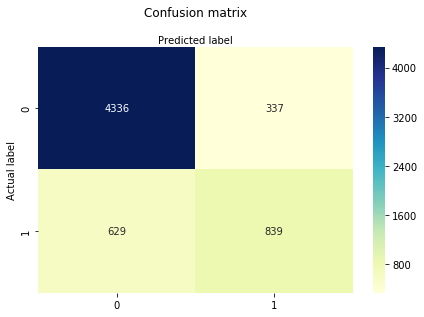

In [118]:
# Confusion matrix on evaluation set
cm = confusion_matrix(y_val, pred_xgb_tune)
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sbs.heatmap(pd.DataFrame(cm), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

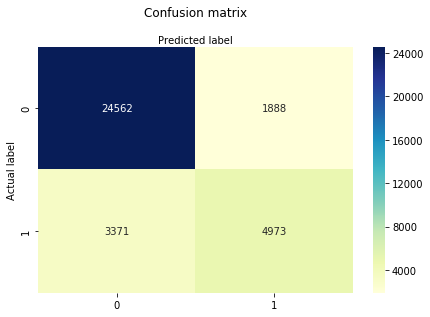

In [119]:
# Confusion matrix on training set to check for the overfit
pred_train_xgb_tune = xgb_tune.predict(X_train)
cm = confusion_matrix(y_train, pred_train_xgb_tune)
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sbs.heatmap(pd.DataFrame(cm), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [120]:
# Accuracy Calculation on evaluation set
print('Accuracy_score : ', accuracy_score(y_val, pred_xgb_tune))
# Calculating precision and recall score on evaluation set
print('Precision:', precision_score(list(y_val), pred_xgb_tune))
print('Recall:', recall_score(list(y_val), pred_xgb_tune))

Accuracy_score :  0.842696629213
Precision: 0.71343537415
Recall: 0.571525885559


In [121]:
# Accuracycalculation on training set to check overfit
print('Accuracy_score : ', accuracy_score(y_train, pred_train_xgb_tune))
# Calculating precision and recall score on training set to check overfit
print('Precision:', precision_score(list(y_train), pred_train_xgb_tune))
print('Recall:', recall_score(list(y_train), pred_train_xgb_tune))

Accuracy_score :  0.84885325056
Precision: 0.724821454598
Recall: 0.595997123682


In XGBOOST grid search model we received 57% recall

# Catboost

In [122]:
from catboost import CatBoostClassifier
cbr = CatBoostClassifier()

In [123]:
# catboost model building
cbr.fit(X_train, y_train, eval_set = (X_val,y_val),plot=True,verbose=True) 

A Jupyter Widget

Learning rate set to 0.113269
0:	learn: 0.5990103	test: 0.5984623	best: 0.5984623 (0)	total: 260ms	remaining: 4m 20s
1:	learn: 0.5353378	test: 0.5344353	best: 0.5344353 (1)	total: 381ms	remaining: 3m 9s
2:	learn: 0.4890363	test: 0.4873402	best: 0.4873402 (2)	total: 517ms	remaining: 2m 51s
3:	learn: 0.4574291	test: 0.4554424	best: 0.4554424 (3)	total: 669ms	remaining: 2m 46s
4:	learn: 0.4340861	test: 0.4317691	best: 0.4317691 (4)	total: 873ms	remaining: 2m 53s
5:	learn: 0.4195135	test: 0.4169931	best: 0.4169931 (5)	total: 1.05s	remaining: 2m 54s
6:	learn: 0.4068083	test: 0.4042676	best: 0.4042676 (6)	total: 1.2s	remaining: 2m 50s
7:	learn: 0.3977037	test: 0.3948336	best: 0.3948336 (7)	total: 1.35s	remaining: 2m 47s
8:	learn: 0.3897509	test: 0.3867528	best: 0.3867528 (8)	total: 1.48s	remaining: 2m 42s
9:	learn: 0.3839549	test: 0.3810457	best: 0.3810457 (9)	total: 1.63s	remaining: 2m 40s
10:	learn: 0.3792626	test: 0.3763088	best: 0.3763088 (10)	total: 1.78s	remaining: 2m 40s
11:	learn: 0.

93:	learn: 0.3374344	test: 0.3376818	best: 0.3376785 (92)	total: 13s	remaining: 2m 5s
94:	learn: 0.3373277	test: 0.3376294	best: 0.3376294 (94)	total: 13.1s	remaining: 2m 5s
95:	learn: 0.3371438	test: 0.3375217	best: 0.3375217 (95)	total: 13.3s	remaining: 2m 4s
96:	learn: 0.3369451	test: 0.3374716	best: 0.3374716 (96)	total: 13.4s	remaining: 2m 4s
97:	learn: 0.3368225	test: 0.3374526	best: 0.3374526 (97)	total: 13.5s	remaining: 2m 4s
98:	learn: 0.3367628	test: 0.3374230	best: 0.3374230 (98)	total: 13.7s	remaining: 2m 4s
99:	learn: 0.3367007	test: 0.3374184	best: 0.3374184 (99)	total: 13.8s	remaining: 2m 4s
100:	learn: 0.3366002	test: 0.3373517	best: 0.3373517 (100)	total: 14s	remaining: 2m 4s
101:	learn: 0.3365446	test: 0.3373402	best: 0.3373402 (101)	total: 14.1s	remaining: 2m 3s
102:	learn: 0.3364534	test: 0.3372982	best: 0.3372982 (102)	total: 14.2s	remaining: 2m 3s
103:	learn: 0.3363222	test: 0.3372633	best: 0.3372633 (103)	total: 14.3s	remaining: 2m 3s
104:	learn: 0.3362470	test: 

185:	learn: 0.3303671	test: 0.3356434	best: 0.3356063 (166)	total: 24.9s	remaining: 1m 48s
186:	learn: 0.3303546	test: 0.3356290	best: 0.3356063 (166)	total: 25s	remaining: 1m 48s
187:	learn: 0.3302999	test: 0.3356163	best: 0.3356063 (166)	total: 25.1s	remaining: 1m 48s
188:	learn: 0.3302689	test: 0.3356098	best: 0.3356063 (166)	total: 25.3s	remaining: 1m 48s
189:	learn: 0.3302576	test: 0.3356402	best: 0.3356063 (166)	total: 25.4s	remaining: 1m 48s
190:	learn: 0.3302248	test: 0.3356580	best: 0.3356063 (166)	total: 25.5s	remaining: 1m 48s
191:	learn: 0.3301673	test: 0.3356170	best: 0.3356063 (166)	total: 25.7s	remaining: 1m 48s
192:	learn: 0.3301449	test: 0.3356173	best: 0.3356063 (166)	total: 25.8s	remaining: 1m 47s
193:	learn: 0.3301433	test: 0.3356309	best: 0.3356063 (166)	total: 25.9s	remaining: 1m 47s
194:	learn: 0.3301348	test: 0.3356201	best: 0.3356063 (166)	total: 26s	remaining: 1m 47s
195:	learn: 0.3300589	test: 0.3355996	best: 0.3355996 (195)	total: 26.2s	remaining: 1m 47s
196

277:	learn: 0.3265083	test: 0.3355220	best: 0.3353192 (257)	total: 36.7s	remaining: 1m 35s
278:	learn: 0.3264982	test: 0.3355264	best: 0.3353192 (257)	total: 36.8s	remaining: 1m 35s
279:	learn: 0.3264849	test: 0.3355224	best: 0.3353192 (257)	total: 36.9s	remaining: 1m 34s
280:	learn: 0.3264824	test: 0.3355316	best: 0.3353192 (257)	total: 37s	remaining: 1m 34s
281:	learn: 0.3264047	test: 0.3355562	best: 0.3353192 (257)	total: 37.2s	remaining: 1m 34s
282:	learn: 0.3263751	test: 0.3355514	best: 0.3353192 (257)	total: 37.3s	remaining: 1m 34s
283:	learn: 0.3263313	test: 0.3355881	best: 0.3353192 (257)	total: 37.5s	remaining: 1m 34s
284:	learn: 0.3263100	test: 0.3355635	best: 0.3353192 (257)	total: 37.6s	remaining: 1m 34s
285:	learn: 0.3262993	test: 0.3355374	best: 0.3353192 (257)	total: 37.7s	remaining: 1m 34s
286:	learn: 0.3262965	test: 0.3355345	best: 0.3353192 (257)	total: 37.9s	remaining: 1m 34s
287:	learn: 0.3262889	test: 0.3355404	best: 0.3353192 (257)	total: 38s	remaining: 1m 33s
288

369:	learn: 0.3248731	test: 0.3357363	best: 0.3353192 (257)	total: 47.8s	remaining: 1m 21s
370:	learn: 0.3248559	test: 0.3357096	best: 0.3353192 (257)	total: 48s	remaining: 1m 21s
371:	learn: 0.3248557	test: 0.3357088	best: 0.3353192 (257)	total: 48.1s	remaining: 1m 21s
372:	learn: 0.3248399	test: 0.3357096	best: 0.3353192 (257)	total: 48.2s	remaining: 1m 21s
373:	learn: 0.3248111	test: 0.3357906	best: 0.3353192 (257)	total: 48.3s	remaining: 1m 20s
374:	learn: 0.3248099	test: 0.3357879	best: 0.3353192 (257)	total: 48.4s	remaining: 1m 20s
375:	learn: 0.3247978	test: 0.3358027	best: 0.3353192 (257)	total: 48.5s	remaining: 1m 20s
376:	learn: 0.3247811	test: 0.3358161	best: 0.3353192 (257)	total: 48.7s	remaining: 1m 20s
377:	learn: 0.3247782	test: 0.3358254	best: 0.3353192 (257)	total: 48.8s	remaining: 1m 20s
378:	learn: 0.3247322	test: 0.3357914	best: 0.3353192 (257)	total: 48.9s	remaining: 1m 20s
379:	learn: 0.3247069	test: 0.3358208	best: 0.3353192 (257)	total: 49s	remaining: 1m 20s
380

460:	learn: 0.3229489	test: 0.3359721	best: 0.3353192 (257)	total: 59.3s	remaining: 1m 9s
461:	learn: 0.3229488	test: 0.3359722	best: 0.3353192 (257)	total: 59.4s	remaining: 1m 9s
462:	learn: 0.3229460	test: 0.3359735	best: 0.3353192 (257)	total: 59.5s	remaining: 1m 8s
463:	learn: 0.3229443	test: 0.3359919	best: 0.3353192 (257)	total: 59.6s	remaining: 1m 8s
464:	learn: 0.3229120	test: 0.3359811	best: 0.3353192 (257)	total: 59.8s	remaining: 1m 8s
465:	learn: 0.3228939	test: 0.3359863	best: 0.3353192 (257)	total: 59.9s	remaining: 1m 8s
466:	learn: 0.3228684	test: 0.3359940	best: 0.3353192 (257)	total: 1m	remaining: 1m 8s
467:	learn: 0.3228479	test: 0.3360133	best: 0.3353192 (257)	total: 1m	remaining: 1m 8s
468:	learn: 0.3228136	test: 0.3359827	best: 0.3353192 (257)	total: 1m	remaining: 1m 8s
469:	learn: 0.3228118	test: 0.3359888	best: 0.3353192 (257)	total: 1m	remaining: 1m 8s
470:	learn: 0.3228096	test: 0.3359853	best: 0.3353192 (257)	total: 1m	remaining: 1m 7s
471:	learn: 0.3228093	tes

553:	learn: 0.3220649	test: 0.3362018	best: 0.3353192 (257)	total: 1m 10s	remaining: 56.9s
554:	learn: 0.3220610	test: 0.3362131	best: 0.3353192 (257)	total: 1m 10s	remaining: 56.8s
555:	learn: 0.3220608	test: 0.3362140	best: 0.3353192 (257)	total: 1m 10s	remaining: 56.6s
556:	learn: 0.3220057	test: 0.3361710	best: 0.3353192 (257)	total: 1m 11s	remaining: 56.5s
557:	learn: 0.3220057	test: 0.3361712	best: 0.3353192 (257)	total: 1m 11s	remaining: 56.3s
558:	learn: 0.3219988	test: 0.3361694	best: 0.3353192 (257)	total: 1m 11s	remaining: 56.2s
559:	learn: 0.3219979	test: 0.3361700	best: 0.3353192 (257)	total: 1m 11s	remaining: 56.1s
560:	learn: 0.3219931	test: 0.3361631	best: 0.3353192 (257)	total: 1m 11s	remaining: 56s
561:	learn: 0.3219931	test: 0.3361640	best: 0.3353192 (257)	total: 1m 11s	remaining: 55.9s
562:	learn: 0.3219929	test: 0.3361645	best: 0.3353192 (257)	total: 1m 11s	remaining: 55.8s
563:	learn: 0.3219713	test: 0.3361833	best: 0.3353192 (257)	total: 1m 12s	remaining: 55.7s
5

645:	learn: 0.3212898	test: 0.3364523	best: 0.3353192 (257)	total: 1m 22s	remaining: 45.2s
646:	learn: 0.3212896	test: 0.3364518	best: 0.3353192 (257)	total: 1m 22s	remaining: 45.1s
647:	learn: 0.3212893	test: 0.3364514	best: 0.3353192 (257)	total: 1m 22s	remaining: 44.9s
648:	learn: 0.3212892	test: 0.3364539	best: 0.3353192 (257)	total: 1m 22s	remaining: 44.8s
649:	learn: 0.3212741	test: 0.3364105	best: 0.3353192 (257)	total: 1m 22s	remaining: 44.7s
650:	learn: 0.3212741	test: 0.3364105	best: 0.3353192 (257)	total: 1m 23s	remaining: 44.5s
651:	learn: 0.3212741	test: 0.3364107	best: 0.3353192 (257)	total: 1m 23s	remaining: 44.4s
652:	learn: 0.3212740	test: 0.3364142	best: 0.3353192 (257)	total: 1m 23s	remaining: 44.2s
653:	learn: 0.3211769	test: 0.3363672	best: 0.3353192 (257)	total: 1m 23s	remaining: 44.1s
654:	learn: 0.3211359	test: 0.3363843	best: 0.3353192 (257)	total: 1m 23s	remaining: 44s
655:	learn: 0.3211355	test: 0.3363825	best: 0.3353192 (257)	total: 1m 23s	remaining: 43.9s
6

737:	learn: 0.3198942	test: 0.3367815	best: 0.3353192 (257)	total: 1m 34s	remaining: 33.5s
738:	learn: 0.3198772	test: 0.3367687	best: 0.3353192 (257)	total: 1m 34s	remaining: 33.3s
739:	learn: 0.3198403	test: 0.3367867	best: 0.3353192 (257)	total: 1m 34s	remaining: 33.2s
740:	learn: 0.3198403	test: 0.3367861	best: 0.3353192 (257)	total: 1m 34s	remaining: 33.1s
741:	learn: 0.3198402	test: 0.3367864	best: 0.3353192 (257)	total: 1m 34s	remaining: 32.9s
742:	learn: 0.3198401	test: 0.3367852	best: 0.3353192 (257)	total: 1m 34s	remaining: 32.8s
743:	learn: 0.3198397	test: 0.3367852	best: 0.3353192 (257)	total: 1m 34s	remaining: 32.7s
744:	learn: 0.3198335	test: 0.3367842	best: 0.3353192 (257)	total: 1m 35s	remaining: 32.5s
745:	learn: 0.3198296	test: 0.3367634	best: 0.3353192 (257)	total: 1m 35s	remaining: 32.4s
746:	learn: 0.3198239	test: 0.3367706	best: 0.3353192 (257)	total: 1m 35s	remaining: 32.3s
747:	learn: 0.3198239	test: 0.3367708	best: 0.3353192 (257)	total: 1m 35s	remaining: 32.2s

828:	learn: 0.3188945	test: 0.3369948	best: 0.3353192 (257)	total: 1m 46s	remaining: 21.9s
829:	learn: 0.3188938	test: 0.3369918	best: 0.3353192 (257)	total: 1m 46s	remaining: 21.8s
830:	learn: 0.3188887	test: 0.3370050	best: 0.3353192 (257)	total: 1m 46s	remaining: 21.7s
831:	learn: 0.3188887	test: 0.3370062	best: 0.3353192 (257)	total: 1m 46s	remaining: 21.5s
832:	learn: 0.3188885	test: 0.3370063	best: 0.3353192 (257)	total: 1m 46s	remaining: 21.4s
833:	learn: 0.3188718	test: 0.3370412	best: 0.3353192 (257)	total: 1m 46s	remaining: 21.3s
834:	learn: 0.3187435	test: 0.3369012	best: 0.3353192 (257)	total: 1m 47s	remaining: 21.2s
835:	learn: 0.3187423	test: 0.3369009	best: 0.3353192 (257)	total: 1m 47s	remaining: 21s
836:	learn: 0.3187232	test: 0.3369266	best: 0.3353192 (257)	total: 1m 47s	remaining: 20.9s
837:	learn: 0.3187144	test: 0.3369230	best: 0.3353192 (257)	total: 1m 47s	remaining: 20.8s
838:	learn: 0.3187135	test: 0.3369137	best: 0.3353192 (257)	total: 1m 47s	remaining: 20.7s
8

920:	learn: 0.3178835	test: 0.3372788	best: 0.3353192 (257)	total: 1m 58s	remaining: 10.1s
921:	learn: 0.3178251	test: 0.3372730	best: 0.3353192 (257)	total: 1m 58s	remaining: 10s
922:	learn: 0.3178250	test: 0.3372737	best: 0.3353192 (257)	total: 1m 58s	remaining: 9.89s
923:	learn: 0.3178242	test: 0.3372794	best: 0.3353192 (257)	total: 1m 58s	remaining: 9.76s
924:	learn: 0.3178241	test: 0.3372811	best: 0.3353192 (257)	total: 1m 58s	remaining: 9.63s
925:	learn: 0.3177990	test: 0.3372639	best: 0.3353192 (257)	total: 1m 58s	remaining: 9.5s
926:	learn: 0.3177142	test: 0.3372286	best: 0.3353192 (257)	total: 1m 59s	remaining: 9.37s
927:	learn: 0.3177104	test: 0.3372653	best: 0.3353192 (257)	total: 1m 59s	remaining: 9.25s
928:	learn: 0.3177060	test: 0.3372829	best: 0.3353192 (257)	total: 1m 59s	remaining: 9.12s
929:	learn: 0.3177049	test: 0.3372769	best: 0.3353192 (257)	total: 1m 59s	remaining: 8.99s
930:	learn: 0.3177048	test: 0.3372769	best: 0.3353192 (257)	total: 1m 59s	remaining: 8.86s
93

In [124]:
# prediction on evaluation set
pred_cat = cbr.predict(X_val)

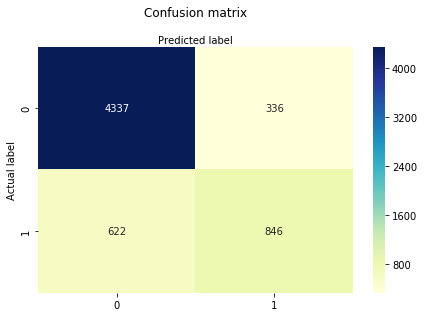

In [125]:
# Confusion matrix on evaluation set
cm = confusion_matrix(y_val, pred_cat)
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sbs.heatmap(pd.DataFrame(cm), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

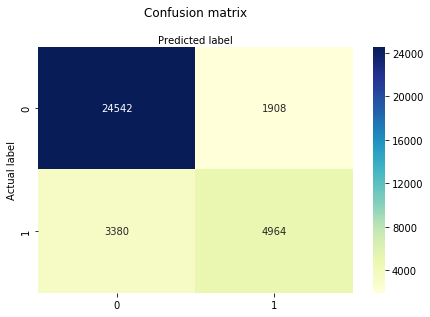

In [126]:
# Confusion matrix on training set to check for the overfit
pred_train_cbr = cbr.predict(X_train)
cm = confusion_matrix(y_train, pred_train_cbr)
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sbs.heatmap(pd.DataFrame(cm), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [127]:
# Accuracy calculation on evaluation set
print('Accuracy_score : ', accuracy_score(y_val, pred_cat))
# Calculating precision and recall score on evaluation set
print('Precision:', precision_score(list(y_val), pred_cat))
print('Recall:', recall_score(list(y_val), pred_cat))

Accuracy_score :  0.84399934864
Precision: 0.715736040609
Recall: 0.576294277929


In [128]:
# Accuracy calculation on training set to check overfit
print('Accuracy_score : ', accuracy_score(y_train, pred_train_cbr))
# Calculating precision and recall score on training set to check overfit
print('Precision:', precision_score(list(y_train), pred_train_cbr))
print('Recall:', recall_score(list(y_train), pred_train_cbr))

Accuracy_score :  0.848019773524
Precision: 0.722351571595
Recall: 0.594918504314


Performance of catboost is same as tuned xgboost, now we will use tuned catboost. As grid search is time consuming
we are skipping that part and tuning the model manually and we will keep the best result

In [129]:
cbr_tune = CatBoostClassifier(
    iterations= 1000,
    depth= 7,
    learning_rate= 0.02,
    random_seed=100,
    logging_level='Silent',
    loss_function = 'Logloss',
    use_best_model=True
)

In [130]:
# catboost model building
cbr_tune.fit(X_train, y_train, eval_set = (X_val,y_val),plot=True,verbose=True) 

A Jupyter Widget

0:	learn: 0.6747413	test: 0.6746332	best: 0.6746332 (0)	total: 189ms	remaining: 3m 8s
1:	learn: 0.6567086	test: 0.6564332	best: 0.6564332 (1)	total: 345ms	remaining: 2m 52s
2:	learn: 0.6409556	test: 0.6406547	best: 0.6406547 (2)	total: 513ms	remaining: 2m 50s
3:	learn: 0.6253053	test: 0.6248754	best: 0.6248754 (3)	total: 671ms	remaining: 2m 47s
4:	learn: 0.6104366	test: 0.6099654	best: 0.6099654 (4)	total: 890ms	remaining: 2m 57s
5:	learn: 0.5969336	test: 0.5963693	best: 0.5963693 (5)	total: 1.12s	remaining: 3m 5s
6:	learn: 0.5850182	test: 0.5844260	best: 0.5844260 (6)	total: 1.27s	remaining: 3m
7:	learn: 0.5738613	test: 0.5730332	best: 0.5730332 (7)	total: 1.43s	remaining: 2m 57s
8:	learn: 0.5629540	test: 0.5620333	best: 0.5620333 (8)	total: 1.58s	remaining: 2m 54s
9:	learn: 0.5519929	test: 0.5510803	best: 0.5510803 (9)	total: 1.73s	remaining: 2m 51s
10:	learn: 0.5422394	test: 0.5413002	best: 0.5413002 (10)	total: 1.88s	remaining: 2m 49s
11:	learn: 0.5330980	test: 0.5320804	best: 0.53

94:	learn: 0.3611501	test: 0.3587709	best: 0.3587709 (94)	total: 16.3s	remaining: 2m 35s
95:	learn: 0.3607750	test: 0.3583826	best: 0.3583826 (95)	total: 16.5s	remaining: 2m 35s
96:	learn: 0.3604289	test: 0.3580322	best: 0.3580322 (96)	total: 16.7s	remaining: 2m 35s
97:	learn: 0.3601168	test: 0.3577127	best: 0.3577127 (97)	total: 16.9s	remaining: 2m 35s
98:	learn: 0.3598628	test: 0.3574602	best: 0.3574602 (98)	total: 17.1s	remaining: 2m 35s
99:	learn: 0.3595793	test: 0.3571393	best: 0.3571393 (99)	total: 17.2s	remaining: 2m 35s
100:	learn: 0.3593388	test: 0.3569194	best: 0.3569194 (100)	total: 17.4s	remaining: 2m 35s
101:	learn: 0.3590684	test: 0.3566434	best: 0.3566434 (101)	total: 17.6s	remaining: 2m 34s
102:	learn: 0.3587956	test: 0.3563790	best: 0.3563790 (102)	total: 17.8s	remaining: 2m 34s
103:	learn: 0.3585084	test: 0.3561357	best: 0.3561357 (103)	total: 17.9s	remaining: 2m 34s
104:	learn: 0.3582402	test: 0.3558184	best: 0.3558184 (104)	total: 18.1s	remaining: 2m 34s
105:	learn:

186:	learn: 0.3459710	test: 0.3446505	best: 0.3446505 (186)	total: 31.7s	remaining: 2m 17s
187:	learn: 0.3459028	test: 0.3446143	best: 0.3446143 (187)	total: 31.9s	remaining: 2m 17s
188:	learn: 0.3457966	test: 0.3445152	best: 0.3445152 (188)	total: 32s	remaining: 2m 17s
189:	learn: 0.3457256	test: 0.3444519	best: 0.3444519 (189)	total: 32.1s	remaining: 2m 16s
190:	learn: 0.3456368	test: 0.3443527	best: 0.3443527 (190)	total: 32.3s	remaining: 2m 16s
191:	learn: 0.3455294	test: 0.3442844	best: 0.3442844 (191)	total: 32.5s	remaining: 2m 16s
192:	learn: 0.3454714	test: 0.3442414	best: 0.3442414 (192)	total: 32.6s	remaining: 2m 16s
193:	learn: 0.3453954	test: 0.3441792	best: 0.3441792 (193)	total: 32.8s	remaining: 2m 16s
194:	learn: 0.3452989	test: 0.3441068	best: 0.3441068 (194)	total: 32.9s	remaining: 2m 15s
195:	learn: 0.3452228	test: 0.3440347	best: 0.3440347 (195)	total: 33.1s	remaining: 2m 15s
196:	learn: 0.3451480	test: 0.3439726	best: 0.3439726 (196)	total: 33.3s	remaining: 2m 15s
1

277:	learn: 0.3405800	test: 0.3405250	best: 0.3405250 (277)	total: 45.7s	remaining: 1m 58s
278:	learn: 0.3405364	test: 0.3404988	best: 0.3404988 (278)	total: 45.8s	remaining: 1m 58s
279:	learn: 0.3405235	test: 0.3404977	best: 0.3404977 (279)	total: 45.9s	remaining: 1m 58s
280:	learn: 0.3404759	test: 0.3404576	best: 0.3404576 (280)	total: 46.1s	remaining: 1m 57s
281:	learn: 0.3404153	test: 0.3404393	best: 0.3404393 (281)	total: 46.3s	remaining: 1m 57s
282:	learn: 0.3403752	test: 0.3404300	best: 0.3404300 (282)	total: 46.4s	remaining: 1m 57s
283:	learn: 0.3403405	test: 0.3404143	best: 0.3404143 (283)	total: 46.6s	remaining: 1m 57s
284:	learn: 0.3402879	test: 0.3403753	best: 0.3403753 (284)	total: 46.7s	remaining: 1m 57s
285:	learn: 0.3402225	test: 0.3403580	best: 0.3403580 (285)	total: 46.9s	remaining: 1m 57s
286:	learn: 0.3401697	test: 0.3403264	best: 0.3403264 (286)	total: 47s	remaining: 1m 56s
287:	learn: 0.3401529	test: 0.3403102	best: 0.3403102 (287)	total: 47.2s	remaining: 1m 56s
2

369:	learn: 0.3375714	test: 0.3387563	best: 0.3387563 (369)	total: 1m	remaining: 1m 42s
370:	learn: 0.3375517	test: 0.3387418	best: 0.3387418 (370)	total: 1m	remaining: 1m 42s
371:	learn: 0.3375145	test: 0.3387351	best: 0.3387351 (371)	total: 1m	remaining: 1m 42s
372:	learn: 0.3374830	test: 0.3387232	best: 0.3387232 (372)	total: 1m	remaining: 1m 42s
373:	learn: 0.3374490	test: 0.3387056	best: 0.3387056 (373)	total: 1m	remaining: 1m 41s
374:	learn: 0.3374249	test: 0.3386883	best: 0.3386883 (374)	total: 1m	remaining: 1m 41s
375:	learn: 0.3373938	test: 0.3386620	best: 0.3386620 (375)	total: 1m 1s	remaining: 1m 41s
376:	learn: 0.3373895	test: 0.3386557	best: 0.3386557 (376)	total: 1m 1s	remaining: 1m 41s
377:	learn: 0.3373603	test: 0.3386386	best: 0.3386386 (377)	total: 1m 1s	remaining: 1m 41s
378:	learn: 0.3373532	test: 0.3386304	best: 0.3386304 (378)	total: 1m 1s	remaining: 1m 40s
379:	learn: 0.3373360	test: 0.3386213	best: 0.3386213 (379)	total: 1m 1s	remaining: 1m 40s
380:	learn: 0.337

460:	learn: 0.3351777	test: 0.3375672	best: 0.3375672 (460)	total: 1m 14s	remaining: 1m 26s
461:	learn: 0.3351589	test: 0.3375627	best: 0.3375627 (461)	total: 1m 14s	remaining: 1m 26s
462:	learn: 0.3351186	test: 0.3375374	best: 0.3375374 (462)	total: 1m 14s	remaining: 1m 26s
463:	learn: 0.3350940	test: 0.3375283	best: 0.3375283 (463)	total: 1m 14s	remaining: 1m 26s
464:	learn: 0.3350551	test: 0.3374977	best: 0.3374977 (464)	total: 1m 14s	remaining: 1m 25s
465:	learn: 0.3350487	test: 0.3374969	best: 0.3374969 (465)	total: 1m 14s	remaining: 1m 25s
466:	learn: 0.3350230	test: 0.3374824	best: 0.3374824 (466)	total: 1m 15s	remaining: 1m 25s
467:	learn: 0.3350055	test: 0.3374694	best: 0.3374694 (467)	total: 1m 15s	remaining: 1m 25s
468:	learn: 0.3349894	test: 0.3374615	best: 0.3374615 (468)	total: 1m 15s	remaining: 1m 25s
469:	learn: 0.3349754	test: 0.3374510	best: 0.3374510 (469)	total: 1m 15s	remaining: 1m 25s
470:	learn: 0.3349647	test: 0.3374446	best: 0.3374446 (470)	total: 1m 15s	remain

551:	learn: 0.3334313	test: 0.3369100	best: 0.3369032 (550)	total: 1m 27s	remaining: 1m 11s
552:	learn: 0.3334189	test: 0.3369026	best: 0.3369026 (552)	total: 1m 27s	remaining: 1m 11s
553:	learn: 0.3334033	test: 0.3369029	best: 0.3369026 (552)	total: 1m 28s	remaining: 1m 10s
554:	learn: 0.3333835	test: 0.3368910	best: 0.3368910 (554)	total: 1m 28s	remaining: 1m 10s
555:	learn: 0.3333816	test: 0.3368886	best: 0.3368886 (555)	total: 1m 28s	remaining: 1m 10s
556:	learn: 0.3333771	test: 0.3368843	best: 0.3368843 (556)	total: 1m 28s	remaining: 1m 10s
557:	learn: 0.3333767	test: 0.3368850	best: 0.3368843 (556)	total: 1m 28s	remaining: 1m 10s
558:	learn: 0.3333408	test: 0.3368922	best: 0.3368843 (556)	total: 1m 28s	remaining: 1m 9s
559:	learn: 0.3333168	test: 0.3368861	best: 0.3368843 (556)	total: 1m 28s	remaining: 1m 9s
560:	learn: 0.3332994	test: 0.3368744	best: 0.3368744 (560)	total: 1m 29s	remaining: 1m 9s
561:	learn: 0.3332934	test: 0.3368717	best: 0.3368717 (561)	total: 1m 29s	remaining

643:	learn: 0.3319513	test: 0.3365615	best: 0.3365615 (643)	total: 1m 41s	remaining: 56.4s
644:	learn: 0.3319204	test: 0.3365543	best: 0.3365543 (644)	total: 1m 42s	remaining: 56.2s
645:	learn: 0.3318980	test: 0.3365603	best: 0.3365543 (644)	total: 1m 42s	remaining: 56.1s
646:	learn: 0.3318894	test: 0.3365676	best: 0.3365543 (644)	total: 1m 42s	remaining: 55.9s
647:	learn: 0.3318670	test: 0.3365562	best: 0.3365543 (644)	total: 1m 42s	remaining: 55.7s
648:	learn: 0.3318411	test: 0.3365448	best: 0.3365448 (648)	total: 1m 42s	remaining: 55.6s
649:	learn: 0.3318409	test: 0.3365456	best: 0.3365448 (648)	total: 1m 42s	remaining: 55.4s
650:	learn: 0.3318061	test: 0.3365213	best: 0.3365213 (650)	total: 1m 43s	remaining: 55.2s
651:	learn: 0.3317821	test: 0.3365096	best: 0.3365096 (651)	total: 1m 43s	remaining: 55.1s
652:	learn: 0.3317626	test: 0.3365021	best: 0.3365021 (652)	total: 1m 43s	remaining: 54.9s
653:	learn: 0.3317612	test: 0.3365013	best: 0.3365013 (653)	total: 1m 43s	remaining: 54.8s

734:	learn: 0.3304813	test: 0.3363297	best: 0.3362824 (730)	total: 1m 56s	remaining: 41.8s
735:	learn: 0.3304757	test: 0.3363265	best: 0.3362824 (730)	total: 1m 56s	remaining: 41.7s
736:	learn: 0.3304756	test: 0.3363270	best: 0.3362824 (730)	total: 1m 56s	remaining: 41.5s
737:	learn: 0.3304646	test: 0.3363210	best: 0.3362824 (730)	total: 1m 56s	remaining: 41.3s
738:	learn: 0.3304470	test: 0.3363074	best: 0.3362824 (730)	total: 1m 56s	remaining: 41.2s
739:	learn: 0.3304274	test: 0.3363042	best: 0.3362824 (730)	total: 1m 56s	remaining: 41s
740:	learn: 0.3303955	test: 0.3362982	best: 0.3362824 (730)	total: 1m 56s	remaining: 40.9s
741:	learn: 0.3303954	test: 0.3362987	best: 0.3362824 (730)	total: 1m 57s	remaining: 40.7s
742:	learn: 0.3303494	test: 0.3362753	best: 0.3362753 (742)	total: 1m 57s	remaining: 40.6s
743:	learn: 0.3303111	test: 0.3362586	best: 0.3362586 (743)	total: 1m 57s	remaining: 40.4s
744:	learn: 0.3302889	test: 0.3362384	best: 0.3362384 (744)	total: 1m 57s	remaining: 40.3s
7

826:	learn: 0.3291126	test: 0.3359825	best: 0.3359790 (823)	total: 2m 10s	remaining: 27.3s
827:	learn: 0.3291116	test: 0.3359814	best: 0.3359790 (823)	total: 2m 10s	remaining: 27.1s
828:	learn: 0.3291116	test: 0.3359818	best: 0.3359790 (823)	total: 2m 10s	remaining: 27s
829:	learn: 0.3290851	test: 0.3359669	best: 0.3359669 (829)	total: 2m 10s	remaining: 26.8s
830:	learn: 0.3290550	test: 0.3359599	best: 0.3359599 (830)	total: 2m 11s	remaining: 26.7s
831:	learn: 0.3290478	test: 0.3359556	best: 0.3359556 (831)	total: 2m 11s	remaining: 26.5s
832:	learn: 0.3290478	test: 0.3359559	best: 0.3359556 (831)	total: 2m 11s	remaining: 26.4s
833:	learn: 0.3290478	test: 0.3359559	best: 0.3359556 (831)	total: 2m 11s	remaining: 26.2s
834:	learn: 0.3290471	test: 0.3359570	best: 0.3359556 (831)	total: 2m 11s	remaining: 26s
835:	learn: 0.3290467	test: 0.3359566	best: 0.3359556 (831)	total: 2m 11s	remaining: 25.9s
836:	learn: 0.3290462	test: 0.3359579	best: 0.3359556 (831)	total: 2m 11s	remaining: 25.7s
837

918:	learn: 0.3281431	test: 0.3357506	best: 0.3357433 (916)	total: 2m 25s	remaining: 12.8s
919:	learn: 0.3281383	test: 0.3357583	best: 0.3357433 (916)	total: 2m 25s	remaining: 12.6s
920:	learn: 0.3281170	test: 0.3357478	best: 0.3357433 (916)	total: 2m 25s	remaining: 12.5s
921:	learn: 0.3281170	test: 0.3357478	best: 0.3357433 (916)	total: 2m 25s	remaining: 12.3s
922:	learn: 0.3281088	test: 0.3357510	best: 0.3357433 (916)	total: 2m 25s	remaining: 12.2s
923:	learn: 0.3280850	test: 0.3357537	best: 0.3357433 (916)	total: 2m 25s	remaining: 12s
924:	learn: 0.3280803	test: 0.3357577	best: 0.3357433 (916)	total: 2m 26s	remaining: 11.8s
925:	learn: 0.3280802	test: 0.3357577	best: 0.3357433 (916)	total: 2m 26s	remaining: 11.7s
926:	learn: 0.3280698	test: 0.3357645	best: 0.3357433 (916)	total: 2m 26s	remaining: 11.5s
927:	learn: 0.3280698	test: 0.3357649	best: 0.3357433 (916)	total: 2m 26s	remaining: 11.4s
928:	learn: 0.3280625	test: 0.3357547	best: 0.3357433 (916)	total: 2m 26s	remaining: 11.2s
9

In [131]:
# prediction on evaluation set
pred_cat_tune = cbr_tune.predict(X_val)

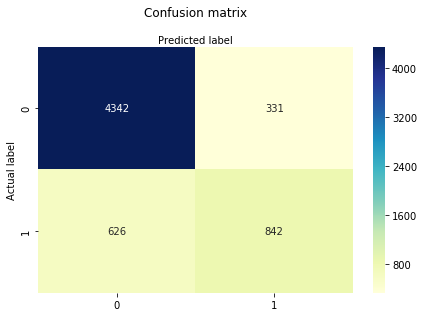

In [132]:
# Confusion matrix on evaluation set
cm = confusion_matrix(y_val, pred_cat_tune)
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sbs.heatmap(pd.DataFrame(cm), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

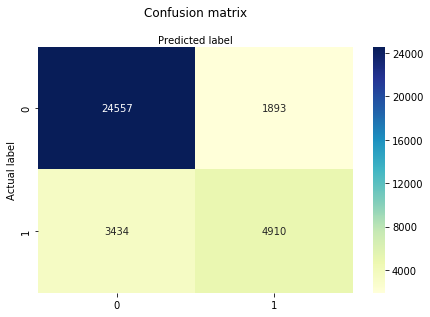

In [133]:
# Confusion matrix on training set to check for the overfit
pred_train_cbr_tune = cbr_tune.predict(X_train)
cm = confusion_matrix(y_train, pred_train_cbr_tune)
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sbs.heatmap(pd.DataFrame(cm), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [134]:
# Accuracy calculation on evaluation set
print('Accuracy_score : ', accuracy_score(y_val, pred_cat_tune))
# Calculating precision and recall score on evaluation set
print('Precision:', precision_score(list(y_val), pred_cat_tune))
print('Recall:', recall_score(list(y_val), pred_cat_tune))

Accuracy_score :  0.844162188569
Precision: 0.717817561807
Recall: 0.573569482289


In [135]:
# Accuracy calculation on training set to check overfit
print('Accuracy_score : ', accuracy_score(y_train, pred_train_cbr_tune))
# Calculating precision and recall score on training set to check overfit
print('Precision:', precision_score(list(y_train), pred_train_cbr))
print('Recall:', recall_score(list(y_train), pred_train_cbr_tune))

Accuracy_score :  0.846898890613
Precision: 0.722351571595
Recall: 0.588446788111


In [136]:
# ROC
from sklearn.metrics import roc_auc_score, roc_curve

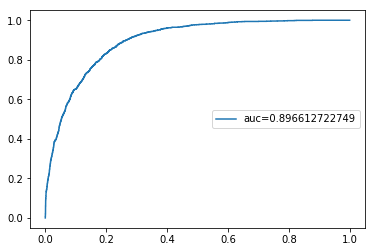

In [137]:
pred_val_cbr_proba = cbr_tune.predict_proba(X_val)[::,1]
fpr, tpr, _ = roc_curve(y_val,  pred_val_cbr_proba)
auc = roc_auc_score(y_val, pred_val_cbr_proba)
plt.plot(fpr,tpr,label="auc="+str(auc))
plt.legend(loc=5)
plt.show()

In [138]:
# Feature importance
features = pd.DataFrame()
features['Feature'] = X_train.columns
features['Score'] = cbr_tune.feature_importances_
features.sort_values(by='Score', ascending=False, inplace=True)
features.reset_index(inplace=True, drop=True)
feature20 = features.loc[:20]
print("Top 20 Feature")
print(feature20)

Top 20 Feature
                             Feature      Score
0   MaritalStatus_Married-civ-spouse  24.461908
1                                Age  19.896375
2                       HoursPerWeek  11.276170
3                       EducationNum  10.756309
4                             fnlwgt   3.579466
5                   Education_Others   3.025125
6                        Gender_Male   2.966524
7         Relationship_Not-in-family   2.921696
8             Relationship_Own-child   2.533789
9           Occupation_Other-service   2.142201
10        Occupation_Exec-managerial   1.854934
11            Relationship_Unmarried   1.345918
12      Occupation_Handlers-cleaners   1.343504
13                 Relationship_Wife   1.303544
14       MaritalStatus_Never-married   1.181901
15         Occupation_Prof-specialty   1.014602
16                  WorkClass_Others   0.869134
17        WorkClass_Self-emp-not-inc   0.863910
18      Occupation_Machine-op-inspct   0.758906
19        Occupation_Farm

In [139]:
# prediction in test data
pred_test = cbr_tune.predict(test_ohe)

In [849]:
# Reading raw test data
test_raw = pd.read_csv("/home/himanshu/Deloitte Case Study/final.csv", index_col = 0)

In [850]:
# We are adding the prediction to the test data
test_raw['Income'] = pred_test

In [852]:
test_raw.head()

,Age,WorkClass,fnlwgt,Education,EducationNum,MaritalStatus,Occupation,Relationship,Gender,CapitalGain,CapitalLoss,HoursPerWeek,NativeCountry,Income
391,27.0,Private,301302.0,Bachelors,13.0,Never-married,Craft-repair,Not-in-family,Male,0.0,0.0,50.0,United-States,0.0
1899,23.0,Private,119838.0,Bachelors,13.0,Never-married,Prof-specialty,NaN,Male,0.0,0.0,NaN,United-States,0.0
24506,21.0,Private,113106.0,Some-college,10.0,Never-married,NaN,Own-child,Female,NaN,0.0,30.0,United-States,0.0
255,21.0,Private,250939.0,Some-college,10.0,Never-married,Machine-op-inspct,Other-relative,Male,0.0,0.0,35.0,United-States,0.0
15331,32.0,Private,155151.0,HS-grad,9.0,Married-civ-spouse,Craft-repair,Husband,Male,0.0,0.0,55.0,United-States,0.0


In [854]:
# Storing test data with predicted labeles csv file in computer storage
test_raw.to_csv("/home/himanshu/Deloitte Case Study/final.csv", index = False)

Accuracy wise all the algorithm performed well. We will choose XGBOOST tuned or Catboost tuned model as they given
good accuracy as well as good recall as compare to the other model

# Re-Useable functions 

In [ ]:
# Data imputation function

In [140]:
def cat_nanpute(df):
    cat_col = list(df.select_dtypes('object').columns)
    nan_col = [col for col in cat_col if df[col].isnull().sum()>0]
    most_occurence =[df[col].fillna(df[col].value_counts().idxmax(),inplace=True) for col in nan_col]

def num_nanpute(df):
    numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64'] 
    nan_col = [col for col in df.select_dtypes(include=numerics).columns if df[col].isnull().sum()>0]
    most_occurence =[df[col].fillna(df[col].median(),inplace=True) for col in nan_col]

In [141]:
# histogram 

In [142]:
def histograms_plot(dataframe, features, rows, cols):
    fig=plt.figure(figsize=(20,20))
    for i, feature in enumerate(dataframe.columns):
        ax=fig.add_subplot(rows,cols,i+1)
        dataframe[feature].hist(bins=20,ax=ax,facecolor='#2e8b57')
        ax.set_title(feature+" Distribution",color='red')

    fig.tight_layout()  

In [143]:
# Bar Plot

In [144]:
def bar_plot(dataframe, features, rows, cols):
    fig=plt.figure(figsize=(20,20))
    for i, column in enumerate(df_cat.columns):
        ax=fig.add_subplot(4,2,i+1)
        sbs.countplot(df_cat[column],ax=ax)

    fig.tight_layout()

In [145]:
# Data exploration

In [151]:
def data_exploration(df):

    print('data head')
    print(df.head())
    print('%of missing value')
    print(df.isnull().sum())
    # We can use algorithm like random forest,
    # stochastic regression for imputation but as only 6% of data missing imputation with median for numeric variable
    # and mode for categorical variable won't affect the distribution so we can use median and mode imputation here
    # defining the function to impute missing value
    def cat_nanpute(df):
        cat_col = list(df.select_dtypes(['object']).columns)
        nan_col = [col for col in cat_col if df[col].isnull().sum()>0]
        most_occurence =[df[col].fillna(df[col].value_counts().idxmax(),inplace=True) for col in nan_col]

    def num_nanpute(df):
        numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64'] 
        nan_col = [col for col in df.select_dtypes(include=numerics).columns if df[col].isnull().sum()>0]
        most_occurence =[df[col].fillna(df[col].median(),inplace=True) for col in nan_col]
    # impute the numeric variables of train data
    num_nanpute(df)
    # impute the categorical variables of train data
    cat_nanpute(df)
    # selecting numeric variables
    df_num = df.select_dtypes(exclude=['object'])
    print('dimention of only numeric variables')
    df_num.shape
    # defining histogram_function
    def histograms_plot(dataframe, features, rows, cols):
        fig=plt.figure(figsize=(20,20))
        for i, feature in enumerate(dataframe.columns):
            ax=fig.add_subplot(rows,cols,i+1)
            dataframe[feature].hist(bins=20,ax=ax,facecolor='#2e8b57')
            ax.set_title(feature+" Distribution",color='red')

        fig.tight_layout()  
    print('histogram for numeric variables')
    histograms_plot(df_num, df_num.columns, 3,2)
    # Selecting categorical columns
    df_cat = df.select_dtypes(["object"])
    df_cat.shape
    # defining bar plot function
    def bar_plot(dataframe, features, rows, cols):
        fig=plt.figure(figsize=(20,20))
        for i, column in enumerate(df_cat.columns):
            ax=fig.add_subplot(4,2,i+1)
            sbs.countplot(df_cat[column],ax=ax)

        fig.tight_layout()
    # Calling bar pl;ot function
    print('bar plot for caategorical variables')
    bar_plot(df_cat, df_cat.columns, 4, 2)
    # storing categorical columns name in a variable
    cat_col = df_cat.columns
    # removing unnecessary space
    df[cat_col] = df[cat_col].apply(lambda x: x.str.strip())
    #Filter categorical variables
    categorical_columns = [x for x in df.dtypes.index if df.dtypes[x] == 'object']
    for col in categorical_columns:
       print ('\nFrequency of Categories for variable %s'%col)
       print (df[col].value_counts())

data head
    Age         WorkClass    fnlwgt  Education  EducationNum  \
0  39.0              Govt   77516.0  Bachelors          13.0   
1  50.0  Self-emp-not-inc   83311.0  Bachelors          13.0   
2  38.0           Private  215646.0    HS-grad           9.0   
3  53.0           Private  178251.0    HS-grad           7.0   
4  28.0           Private  338409.0  Bachelors          13.0   

        MaritalStatus         Occupation   Relationship Gender  HoursPerWeek  \
0       Never-married       Adm-clerical  Not-in-family   Male          40.0   
1  Married-civ-spouse     Prof-specialty        Husband   Male          13.0   
2            Divorced  Handlers-cleaners  Not-in-family   Male          40.0   
3  Married-civ-spouse  Handlers-cleaners        Husband   Male          40.0   
4  Married-civ-spouse     Prof-specialty           Wife   Male          40.0   

  NativeCountry  
0    US_citizen  
1    US_citizen  
2    US_citizen  
3    US_citizen  
4     Immigrant  
%of missing valu

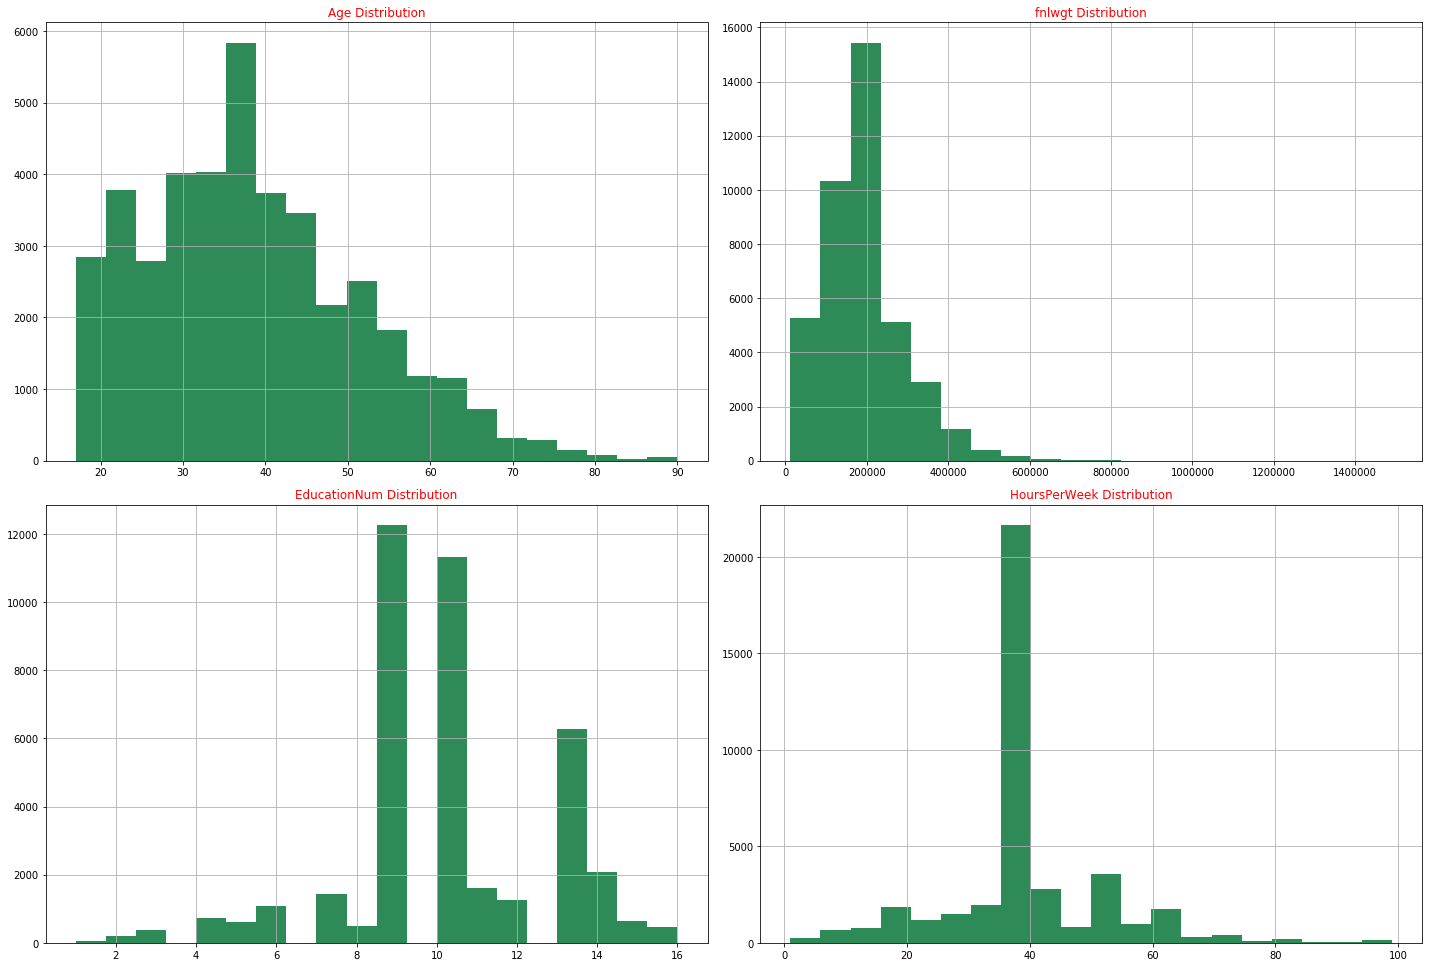

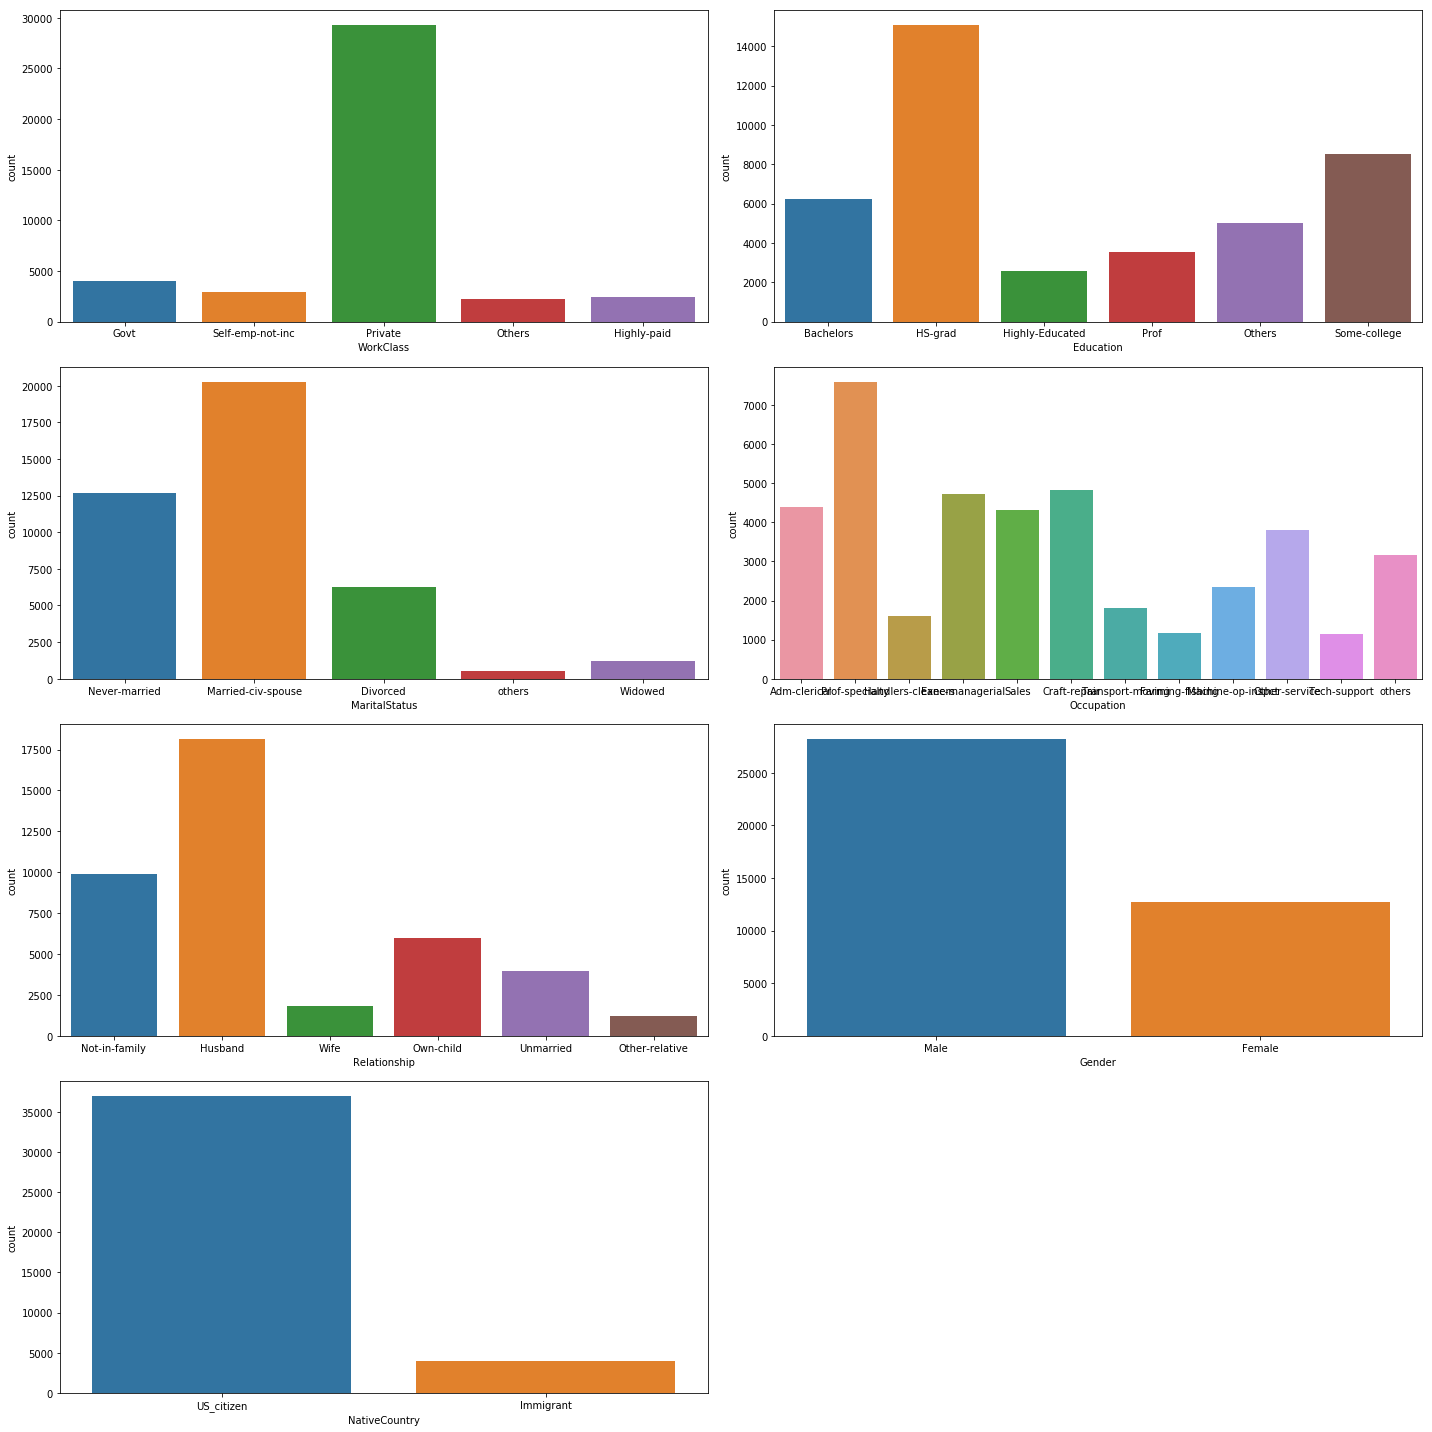

In [152]:
data_exploration(df)

In [827]:
# Model building and result generation automated function along with train test split

In [841]:
def catboost_classifier_auto(X,y,itr, depth, lr):
    # Import liberary
    from sklearn.model_selection import train_test_split
    from sklearn.metrics import accuracy_score, confusion_matrix,auc, precision_score, recall_score
    from sklearn.metrics import roc_auc_score, roc_curve
    from catboost import CatBoostClassifier
    # train test split
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.15, random_state=100)
    # Build catboost model instance with parameter
    cbr = CatBoostClassifier(
        iterations= itr,
        depth= depth,
        learning_rate= lr,
        random_seed=100,
        logging_level='Silent',
        loss_function = 'Logloss',
        use_best_model=True
    )
    # Model building
    cbr.fit(X_train, y_train, eval_set = (X_val,y_val),plot=True,verbose=True) 
    # Prediction on validation set
    # prediction on evaluation set
    pred = cbr.predict(X_val)
    # Model evaluation
    # Confution matrix on evaluation set
    cm = confusion_matrix(y_val, pred_cat_tune)
    class_names=[0,1] # name  of classes
    fig, ax = plt.subplots()
    tick_marks = np.arange(len(class_names))
    plt.xticks(tick_marks, class_names)
    plt.yticks(tick_marks, class_names)
    # create heatmap
    sbs.heatmap(pd.DataFrame(cm), annot=True, cmap="YlGnBu" ,fmt='g')
    ax.xaxis.set_label_position("top")
    plt.tight_layout()
    plt.title('Confusion matrix', y=1.1)
    plt.ylabel('Actual label')
    plt.xlabel('Predicted label')

    # Accuracy and AUC calculation on evaluation set
    print('Acuracy_score : ', accuracy_score(y_val, pred))
    # Calculating precision and recall score on evaluation set
    print('Precision:', precision_score(list(y_val), pred))
    print('Recall:', recall_score(list(y_val), pred))
    # Feature importance
    features = pd.DataFrame()
    features['Feature'] = X_train.columns
    features['Score'] = cbr.feature_importances_
    features.sort_values(by='Score', ascending=False, inplace=True)
    features.reset_index(inplace=True, drop=True)
    feature20 = features.loc[:20]
    print("Top 20 Feature")
    print(feature20)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 0.6741753	test: 0.6740044	best: 0.6740044 (0)	total: 112ms	remaining: 2m 14s
1:	learn: 0.6580917	test: 0.6576194	best: 0.6576194 (1)	total: 190ms	remaining: 1m 54s
2:	learn: 0.6415192	test: 0.6408651	best: 0.6408651 (2)	total: 281ms	remaining: 1m 51s
3:	learn: 0.6267127	test: 0.6259973	best: 0.6259973 (3)	total: 367ms	remaining: 1m 49s
4:	learn: 0.6124454	test: 0.6115804	best: 0.6115804 (4)	total: 436ms	remaining: 1m 44s
5:	learn: 0.5992097	test: 0.5982878	best: 0.5982878 (5)	total: 495ms	remaining: 1m 38s
6:	learn: 0.5865252	test: 0.5856708	best: 0.5856708 (6)	total: 555ms	remaining: 1m 34s
7:	learn: 0.5746777	test: 0.5737633	best: 0.5737633 (7)	total: 635ms	remaining: 1m 34s
8:	learn: 0.5630405	test: 0.5621250	best: 0.5621250 (8)	total: 699ms	remaining: 1m 32s
9:	learn: 0.5530665	test: 0.5520510	best: 0.5520510 (9)	total: 746ms	remaining: 1m 28s
10:	learn: 0.5436858	test: 0.5425215	best: 0.5425215 (10)	total: 804ms	remaining: 1m 26s
11:	learn: 0.5344795	test: 0.5332110	best

95:	learn: 0.3607064	test: 0.3581421	best: 0.3581421 (95)	total: 7.33s	remaining: 1m 24s
96:	learn: 0.3603993	test: 0.3578079	best: 0.3578079 (96)	total: 7.41s	remaining: 1m 24s
97:	learn: 0.3601317	test: 0.3575503	best: 0.3575503 (97)	total: 7.5s	remaining: 1m 24s
98:	learn: 0.3599135	test: 0.3573186	best: 0.3573186 (98)	total: 7.56s	remaining: 1m 24s
99:	learn: 0.3596676	test: 0.3570713	best: 0.3570713 (99)	total: 7.67s	remaining: 1m 24s
100:	learn: 0.3593407	test: 0.3567283	best: 0.3567283 (100)	total: 7.72s	remaining: 1m 24s
101:	learn: 0.3590401	test: 0.3564523	best: 0.3564523 (101)	total: 7.79s	remaining: 1m 23s
102:	learn: 0.3587395	test: 0.3561329	best: 0.3561329 (102)	total: 7.86s	remaining: 1m 23s
103:	learn: 0.3584727	test: 0.3558927	best: 0.3558927 (103)	total: 7.92s	remaining: 1m 23s
104:	learn: 0.3582427	test: 0.3556177	best: 0.3556177 (104)	total: 7.99s	remaining: 1m 23s
105:	learn: 0.3579791	test: 0.3553579	best: 0.3553579 (105)	total: 8.06s	remaining: 1m 23s
106:	learn

188:	learn: 0.3461730	test: 0.3444968	best: 0.3444968 (188)	total: 14s	remaining: 1m 14s
189:	learn: 0.3461195	test: 0.3444474	best: 0.3444474 (189)	total: 14.1s	remaining: 1m 14s
190:	learn: 0.3460259	test: 0.3443597	best: 0.3443597 (190)	total: 14.1s	remaining: 1m 14s
191:	learn: 0.3459587	test: 0.3443007	best: 0.3443007 (191)	total: 14.2s	remaining: 1m 14s
192:	learn: 0.3459217	test: 0.3442570	best: 0.3442570 (192)	total: 14.3s	remaining: 1m 14s
193:	learn: 0.3458372	test: 0.3441815	best: 0.3441815 (193)	total: 14.3s	remaining: 1m 14s
194:	learn: 0.3457494	test: 0.3440867	best: 0.3440867 (194)	total: 14.4s	remaining: 1m 14s
195:	learn: 0.3456709	test: 0.3440391	best: 0.3440391 (195)	total: 14.5s	remaining: 1m 14s
196:	learn: 0.3455957	test: 0.3439763	best: 0.3439763 (196)	total: 14.6s	remaining: 1m 14s
197:	learn: 0.3455280	test: 0.3439099	best: 0.3439099 (197)	total: 14.6s	remaining: 1m 14s
198:	learn: 0.3454503	test: 0.3438400	best: 0.3438400 (198)	total: 14.7s	remaining: 1m 14s
1

279:	learn: 0.3409606	test: 0.3403749	best: 0.3403749 (279)	total: 20.1s	remaining: 1m 6s
280:	learn: 0.3409100	test: 0.3403238	best: 0.3403238 (280)	total: 20.2s	remaining: 1m 6s
281:	learn: 0.3408974	test: 0.3403119	best: 0.3403119 (281)	total: 20.3s	remaining: 1m 6s
282:	learn: 0.3408421	test: 0.3402805	best: 0.3402805 (282)	total: 20.3s	remaining: 1m 5s
283:	learn: 0.3407679	test: 0.3402323	best: 0.3402323 (283)	total: 20.4s	remaining: 1m 5s
284:	learn: 0.3407442	test: 0.3402042	best: 0.3402042 (284)	total: 20.5s	remaining: 1m 5s
285:	learn: 0.3406807	test: 0.3401543	best: 0.3401543 (285)	total: 20.5s	remaining: 1m 5s
286:	learn: 0.3406225	test: 0.3401017	best: 0.3401017 (286)	total: 20.6s	remaining: 1m 5s
287:	learn: 0.3405651	test: 0.3400703	best: 0.3400703 (287)	total: 20.7s	remaining: 1m 5s
288:	learn: 0.3405191	test: 0.3400220	best: 0.3400220 (288)	total: 20.8s	remaining: 1m 5s
289:	learn: 0.3404825	test: 0.3399917	best: 0.3399917 (289)	total: 20.8s	remaining: 1m 5s
290:	learn

372:	learn: 0.3374827	test: 0.3382588	best: 0.3382588 (372)	total: 26.4s	remaining: 58.4s
373:	learn: 0.3374545	test: 0.3382467	best: 0.3382467 (373)	total: 26.5s	remaining: 58.4s
374:	learn: 0.3374202	test: 0.3382315	best: 0.3382315 (374)	total: 26.5s	remaining: 58.3s
375:	learn: 0.3374183	test: 0.3382296	best: 0.3382296 (375)	total: 26.6s	remaining: 58.2s
376:	learn: 0.3373909	test: 0.3382187	best: 0.3382187 (376)	total: 26.6s	remaining: 58.1s
377:	learn: 0.3373659	test: 0.3382150	best: 0.3382150 (377)	total: 26.7s	remaining: 58s
378:	learn: 0.3373594	test: 0.3382070	best: 0.3382070 (378)	total: 26.7s	remaining: 57.9s
379:	learn: 0.3373122	test: 0.3381722	best: 0.3381722 (379)	total: 26.8s	remaining: 57.8s
380:	learn: 0.3373093	test: 0.3381711	best: 0.3381711 (380)	total: 26.8s	remaining: 57.7s
381:	learn: 0.3373017	test: 0.3381605	best: 0.3381605 (381)	total: 26.9s	remaining: 57.6s
382:	learn: 0.3372889	test: 0.3381461	best: 0.3381461 (382)	total: 27s	remaining: 57.6s
383:	learn: 0.

466:	learn: 0.3351707	test: 0.3371405	best: 0.3371405 (466)	total: 32.7s	remaining: 51.3s
467:	learn: 0.3351587	test: 0.3371271	best: 0.3371271 (467)	total: 32.7s	remaining: 51.2s
468:	learn: 0.3351415	test: 0.3371155	best: 0.3371155 (468)	total: 32.8s	remaining: 51.1s
469:	learn: 0.3351279	test: 0.3370950	best: 0.3370950 (469)	total: 32.8s	remaining: 51s
470:	learn: 0.3351059	test: 0.3370878	best: 0.3370878 (470)	total: 32.9s	remaining: 50.9s
471:	learn: 0.3350724	test: 0.3370693	best: 0.3370693 (471)	total: 33s	remaining: 50.9s
472:	learn: 0.3350707	test: 0.3370683	best: 0.3370683 (472)	total: 33s	remaining: 50.7s
473:	learn: 0.3350404	test: 0.3370536	best: 0.3370536 (473)	total: 33.1s	remaining: 50.7s
474:	learn: 0.3350348	test: 0.3370421	best: 0.3370421 (474)	total: 33.2s	remaining: 50.6s
475:	learn: 0.3350134	test: 0.3370278	best: 0.3370278 (475)	total: 33.2s	remaining: 50.6s
476:	learn: 0.3350051	test: 0.3370165	best: 0.3370165 (476)	total: 33.3s	remaining: 50.5s
477:	learn: 0.33

558:	learn: 0.3333005	test: 0.3364868	best: 0.3364868 (558)	total: 38.8s	remaining: 44.5s
559:	learn: 0.3332804	test: 0.3364747	best: 0.3364747 (559)	total: 38.9s	remaining: 44.4s
560:	learn: 0.3332728	test: 0.3364676	best: 0.3364676 (560)	total: 39s	remaining: 44.4s
561:	learn: 0.3332535	test: 0.3364667	best: 0.3364667 (561)	total: 39s	remaining: 44.3s
562:	learn: 0.3332438	test: 0.3364573	best: 0.3364573 (562)	total: 39.1s	remaining: 44.2s
563:	learn: 0.3332242	test: 0.3364633	best: 0.3364573 (562)	total: 39.1s	remaining: 44.1s
564:	learn: 0.3331898	test: 0.3364534	best: 0.3364534 (564)	total: 39.2s	remaining: 44s
565:	learn: 0.3331846	test: 0.3364497	best: 0.3364497 (565)	total: 39.2s	remaining: 43.9s
566:	learn: 0.3331572	test: 0.3364177	best: 0.3364177 (566)	total: 39.3s	remaining: 43.9s
567:	learn: 0.3331234	test: 0.3364265	best: 0.3364177 (566)	total: 39.4s	remaining: 43.8s
568:	learn: 0.3330908	test: 0.3364055	best: 0.3364055 (568)	total: 39.5s	remaining: 43.8s
569:	learn: 0.33

650:	learn: 0.3314036	test: 0.3359393	best: 0.3359393 (650)	total: 45.5s	remaining: 38.4s
651:	learn: 0.3313953	test: 0.3359421	best: 0.3359393 (650)	total: 45.6s	remaining: 38.3s
652:	learn: 0.3313841	test: 0.3359254	best: 0.3359254 (652)	total: 45.6s	remaining: 38.2s
653:	learn: 0.3313765	test: 0.3359262	best: 0.3359254 (652)	total: 45.7s	remaining: 38.2s
654:	learn: 0.3313655	test: 0.3359227	best: 0.3359227 (654)	total: 45.8s	remaining: 38.1s
655:	learn: 0.3313501	test: 0.3359154	best: 0.3359154 (655)	total: 45.8s	remaining: 38s
656:	learn: 0.3313284	test: 0.3359240	best: 0.3359154 (655)	total: 45.9s	remaining: 37.9s
657:	learn: 0.3312914	test: 0.3359244	best: 0.3359154 (655)	total: 46s	remaining: 37.9s
658:	learn: 0.3312645	test: 0.3359194	best: 0.3359154 (655)	total: 46.1s	remaining: 37.8s
659:	learn: 0.3312431	test: 0.3359143	best: 0.3359143 (659)	total: 46.2s	remaining: 37.8s
660:	learn: 0.3312387	test: 0.3359173	best: 0.3359143 (659)	total: 46.2s	remaining: 37.7s
661:	learn: 0.

744:	learn: 0.3298067	test: 0.3357868	best: 0.3357599 (722)	total: 52.4s	remaining: 32s
745:	learn: 0.3298056	test: 0.3357864	best: 0.3357599 (722)	total: 52.5s	remaining: 31.9s
746:	learn: 0.3298055	test: 0.3357864	best: 0.3357599 (722)	total: 52.5s	remaining: 31.8s
747:	learn: 0.3297892	test: 0.3357876	best: 0.3357599 (722)	total: 52.6s	remaining: 31.8s
748:	learn: 0.3297764	test: 0.3357848	best: 0.3357599 (722)	total: 52.6s	remaining: 31.7s
749:	learn: 0.3297760	test: 0.3357861	best: 0.3357599 (722)	total: 52.7s	remaining: 31.6s
750:	learn: 0.3297708	test: 0.3357969	best: 0.3357599 (722)	total: 52.8s	remaining: 31.5s
751:	learn: 0.3297547	test: 0.3357934	best: 0.3357599 (722)	total: 52.8s	remaining: 31.5s
752:	learn: 0.3297416	test: 0.3357814	best: 0.3357599 (722)	total: 53s	remaining: 31.4s
753:	learn: 0.3297353	test: 0.3357819	best: 0.3357599 (722)	total: 53.1s	remaining: 31.4s
754:	learn: 0.3297342	test: 0.3357803	best: 0.3357599 (722)	total: 53.1s	remaining: 31.3s
755:	learn: 0.

836:	learn: 0.3285165	test: 0.3357350	best: 0.3357350 (836)	total: 58.8s	remaining: 25.5s
837:	learn: 0.3285165	test: 0.3357349	best: 0.3357349 (837)	total: 58.8s	remaining: 25.4s
838:	learn: 0.3284838	test: 0.3357281	best: 0.3357281 (838)	total: 58.9s	remaining: 25.4s
839:	learn: 0.3284677	test: 0.3357315	best: 0.3357281 (838)	total: 59s	remaining: 25.3s
840:	learn: 0.3284626	test: 0.3357360	best: 0.3357281 (838)	total: 59.1s	remaining: 25.2s
841:	learn: 0.3284477	test: 0.3357336	best: 0.3357281 (838)	total: 59.1s	remaining: 25.1s
842:	learn: 0.3284243	test: 0.3357266	best: 0.3357266 (842)	total: 59.2s	remaining: 25.1s
843:	learn: 0.3284221	test: 0.3357279	best: 0.3357266 (842)	total: 59.3s	remaining: 25s
844:	learn: 0.3283980	test: 0.3357406	best: 0.3357266 (842)	total: 59.3s	remaining: 24.9s
845:	learn: 0.3283892	test: 0.3357390	best: 0.3357266 (842)	total: 59.5s	remaining: 24.9s
846:	learn: 0.3283815	test: 0.3357428	best: 0.3357266 (842)	total: 59.5s	remaining: 24.8s
847:	learn: 0.

930:	learn: 0.3272013	test: 0.3354597	best: 0.3354589 (929)	total: 1m 5s	remaining: 18.9s
931:	learn: 0.3271785	test: 0.3354642	best: 0.3354589 (929)	total: 1m 5s	remaining: 18.8s
932:	learn: 0.3271664	test: 0.3354676	best: 0.3354589 (929)	total: 1m 5s	remaining: 18.7s
933:	learn: 0.3271473	test: 0.3354651	best: 0.3354589 (929)	total: 1m 5s	remaining: 18.7s
934:	learn: 0.3271302	test: 0.3354566	best: 0.3354566 (934)	total: 1m 5s	remaining: 18.6s
935:	learn: 0.3271221	test: 0.3354609	best: 0.3354566 (934)	total: 1m 5s	remaining: 18.5s
936:	learn: 0.3271202	test: 0.3354668	best: 0.3354566 (934)	total: 1m 5s	remaining: 18.4s
937:	learn: 0.3270987	test: 0.3354765	best: 0.3354566 (934)	total: 1m 5s	remaining: 18.4s
938:	learn: 0.3270838	test: 0.3354795	best: 0.3354566 (934)	total: 1m 5s	remaining: 18.3s
939:	learn: 0.3270633	test: 0.3354885	best: 0.3354566 (934)	total: 1m 5s	remaining: 18.2s
940:	learn: 0.3270396	test: 0.3354869	best: 0.3354566 (934)	total: 1m 6s	remaining: 18.2s
941:	learn

1022:	learn: 0.3261186	test: 0.3355011	best: 0.3354566 (934)	total: 1m 11s	remaining: 12.4s
1023:	learn: 0.3260858	test: 0.3354868	best: 0.3354566 (934)	total: 1m 12s	remaining: 12.4s
1024:	learn: 0.3260706	test: 0.3354735	best: 0.3354566 (934)	total: 1m 12s	remaining: 12.3s
1025:	learn: 0.3260598	test: 0.3354661	best: 0.3354566 (934)	total: 1m 12s	remaining: 12.3s
1026:	learn: 0.3260570	test: 0.3354702	best: 0.3354566 (934)	total: 1m 12s	remaining: 12.2s
1027:	learn: 0.3260476	test: 0.3354647	best: 0.3354566 (934)	total: 1m 12s	remaining: 12.1s
1028:	learn: 0.3260189	test: 0.3354620	best: 0.3354566 (934)	total: 1m 12s	remaining: 12.1s
1029:	learn: 0.3259814	test: 0.3354723	best: 0.3354566 (934)	total: 1m 12s	remaining: 12s
1030:	learn: 0.3259594	test: 0.3354639	best: 0.3354566 (934)	total: 1m 12s	remaining: 11.9s
1031:	learn: 0.3259495	test: 0.3354609	best: 0.3354566 (934)	total: 1m 12s	remaining: 11.8s
1032:	learn: 0.3259494	test: 0.3354606	best: 0.3354566 (934)	total: 1m 12s	remaini

1114:	learn: 0.3251840	test: 0.3355610	best: 0.3354487 (1039)	total: 1m 18s	remaining: 5.98s
1115:	learn: 0.3251781	test: 0.3355614	best: 0.3354487 (1039)	total: 1m 18s	remaining: 5.91s
1116:	learn: 0.3251646	test: 0.3355507	best: 0.3354487 (1039)	total: 1m 18s	remaining: 5.84s
1117:	learn: 0.3251541	test: 0.3355509	best: 0.3354487 (1039)	total: 1m 18s	remaining: 5.77s
1118:	learn: 0.3251540	test: 0.3355501	best: 0.3354487 (1039)	total: 1m 18s	remaining: 5.7s
1119:	learn: 0.3251395	test: 0.3355536	best: 0.3354487 (1039)	total: 1m 18s	remaining: 5.63s
1120:	learn: 0.3251387	test: 0.3355545	best: 0.3354487 (1039)	total: 1m 18s	remaining: 5.56s
1121:	learn: 0.3251387	test: 0.3355545	best: 0.3354487 (1039)	total: 1m 18s	remaining: 5.48s
1122:	learn: 0.3251255	test: 0.3355520	best: 0.3354487 (1039)	total: 1m 19s	remaining: 5.42s
1123:	learn: 0.3251077	test: 0.3355565	best: 0.3354487 (1039)	total: 1m 19s	remaining: 5.35s
1124:	learn: 0.3251071	test: 0.3355559	best: 0.3354487 (1039)	total: 1m

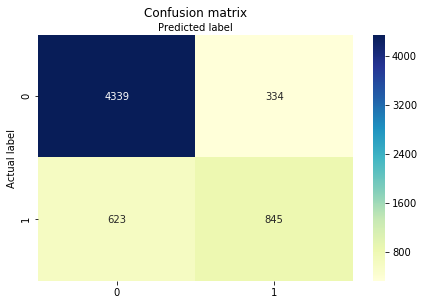

In [842]:
catboost_classifier_auto(data_ohe.iloc[:,:-1], data_ohe.Income, itr = 1200, depth = 7, lr = 0.02 )